# Анализ антропометрии

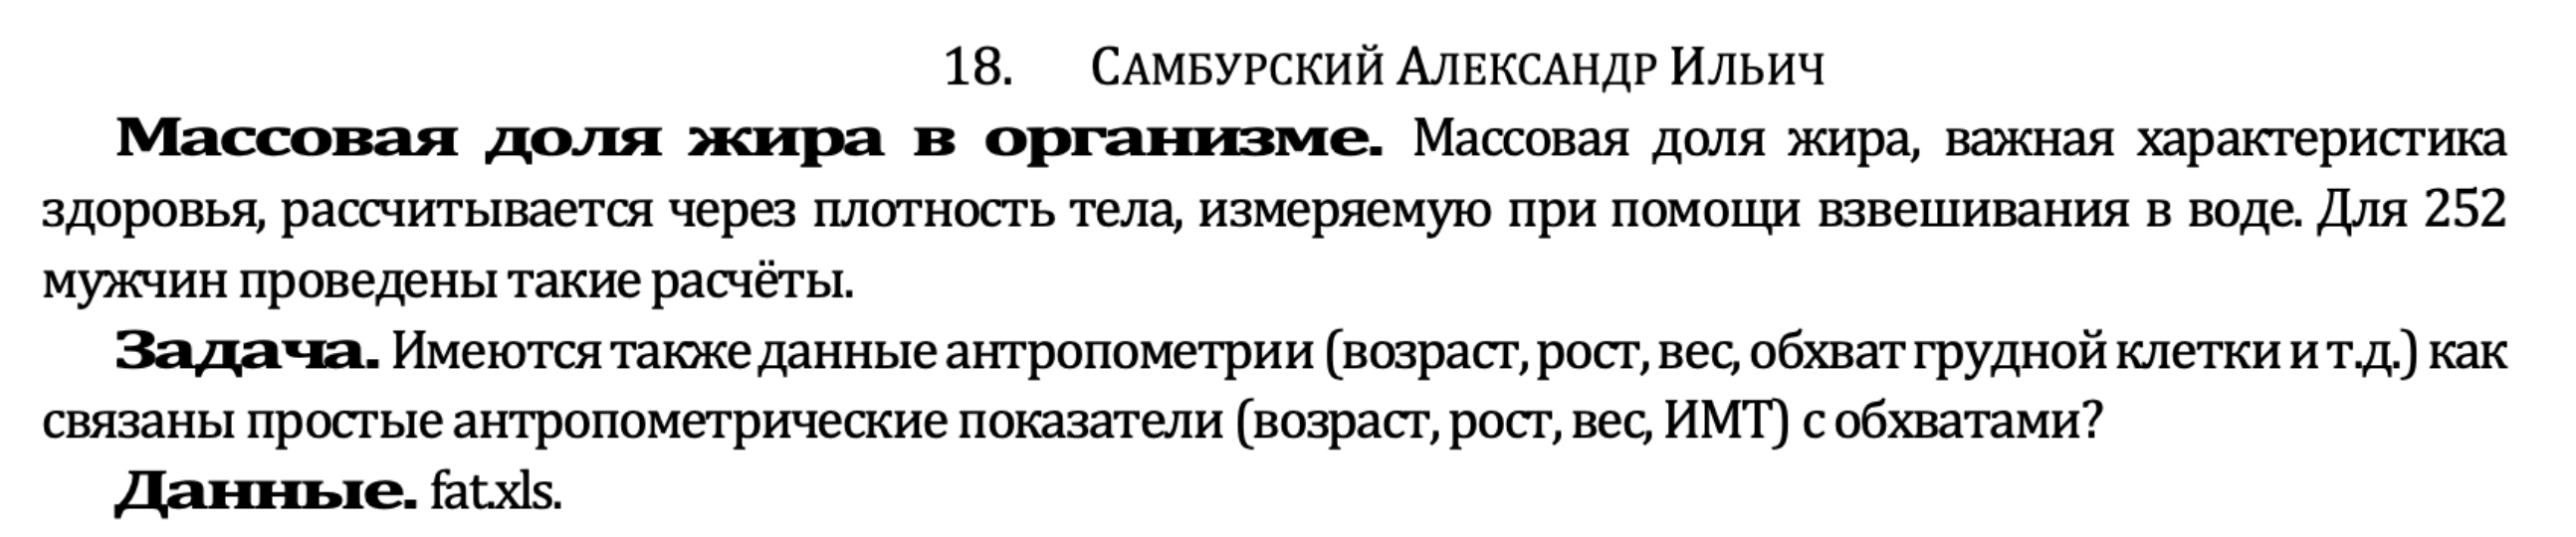

#### В данной задаче требуется установить характер зависимости двумя между группами признаков, описывающих физические параметры человека. Как правило, антропологические признаки для случайной выборки людей распределены по нормальному закону, и, что кажется довольно логичным, дожны зависеть друг от друга. Ниже будет проведён анализ наблюдаемой выборки с помощью различных статистических методов, где искомая зависимость будет продемонстрирована.

#### По ходу экспериментов будут написаны промежуточные выводы и произведено обсуждение получаемых результатов.

In [9]:
import numpy as np
import pandas as pd
import scipy
import scipy as sc
import scipy.stats
import matplotlib.pyplot as plt

## Посмотрим на данные

In [2]:
df = pd.read_excel('fat.xls')
df

№  Доля жира по формуле Брожека (457/плотность - 414.2)  \
0      1                                               12.6      
1      2                                                6.9      
2      3                                               24.6      
3      4                                               10.9      
4      5                                               27.8      
..   ...                                                ...      
247  248                                               11.5      
248  249                                               32.3      
249  250                                               28.3      
250  251                                               25.3      
251  252                                               30.7      

     Доля жира по формуле Сири (495/плотность- 450)  Плотность (г*см^3)  \
0                                              12.3              1.0708   
1                                               6.1              1.0853   
2                                              25.3              1.0414   
3                                              10.4              1.0751   
4                                              28.7              1.0340   
..                                              ...                 ...   
247                                            11.0              1.0736   
248                                            33.6              1.0236   
249                                            29.3              1.0328   
250                                            26.0              1.0399   
251                                            31.9              1.0271   

     Возраст  Вес, фунт  Рост, дюйм  Индекс массы тела (вес/рост^2)  \
0         23     154.25       67.75                            23.7   
1         22     173.25       72.25                            23.4   
2         22     154.00       66.25                            24.7   
3         26     184.75       72.25                            24.9   
4         24     184.25       71.25                            25.6   
..       ...        ...         ...                             ...   
247       70     134.25       67.00                            21.1   
248       72     201.00       69.75                            29.1   
249       72     186.75       66.00                            30.2   
250       72     190.75       70.50                            27.0   
251       74     207.50       70.00                            29.8   

     Вес без учёта жира (вес * (1-доля по ф-ле Брожека))  Окружность шеи, см  \
0                                                134.9                  36.2   
1                                                161.3                  38.5   
2                                                116.0                  34.0   
3                                                164.7                  37.4   
4                                                133.1                  34.4   
..                                                 ...                   ...   
247                                              118.9                  34.9   
248                                              136.1                  40.9   
249                                              133.9                  38.9   
250                                              142.6                  38.9   
251                                              143.7                  40.8   

     Обхват грудной клетки, см  Окружность талии, см  Окружность бёдер, см  \
0                         93.1                  85.2                  94.5   
1                         93.6                  83.0                  98.7   
2                         95.8                  87.9                  99.2   
3                        101.8                  86.4                 101.2   
4                         97.3                 100.0                 101.9   
..                         ... 

In [3]:
df.columns

Index(['№', 'Доля жира по формуле Брожека (457/плотность - 414.2)',
       'Доля жира по формуле Сири (495/плотность- 450)', 'Плотность (г*см^3)',
       'Возраст', 'Вес, фунт', 'Рост, дюйм', 'Индекс массы тела (вес/рост^2)',
       'Вес без учёта жира (вес * (1-доля по ф-ле Брожека))',
       'Окружность шеи, см', 'Обхват грудной клетки, см',
       'Окружность талии, см', 'Окружность бёдер, см', 'Окружность бедра, см',
       'Окружность колена, см', 'Окружность лодыжки, см',
       'Окружность бицепса, см', 'Окружность предплечья, см',
       'Окружность запястья, см'],
      dtype='object')

## Проверим данные на присутствие пропусков 

In [4]:
df.isna().sum()

№                                                       0
Доля жира по формуле Брожека (457/плотность - 414.2)    0
Доля жира по формуле Сири (495/плотность- 450)          0
Плотность (г*см^3)                                      0
Возраст                                                 0
Вес, фунт                                               0
Рост, дюйм                                              0
Индекс массы тела (вес/рост^2)                          0
Вес без учёта жира (вес * (1-доля по ф-ле Брожека))     0
Окружность шеи, см                                      0
Обхват грудной клетки, см                               0
Окружность талии, см                                    0
Окружность бёдер, см                                    0
Окружность бедра, см                                    0
Окружность колена, см                                   0
Окружность лодыжки, см                                  0
Окружность бицепса, см                                  0
Окружность пре

#### Судя по семантическому значению данных (признаковое описание человека) можно сделать предположение о нормальности их распределения. Классический пример: можно считать, что случайная величина - рост человека - распределена нормально. Вероятно, другие показатели будут распределены нормально аналогичным образом. В свою очередь, это даст возможность применять статистические критерии и статистики для анализа искомых зависимостей.

#### Для визуального анализа нормальности признаков выведем их распределения и qq-plot. Ещё ниже выведем p-значения для критерия Шапиро-Уилка для проверки нормальности.

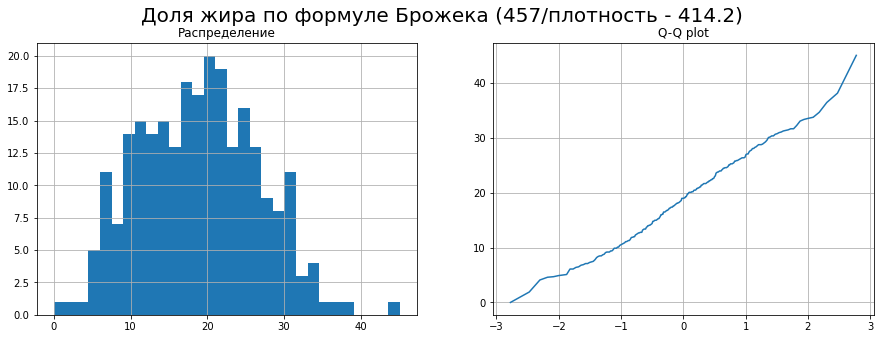

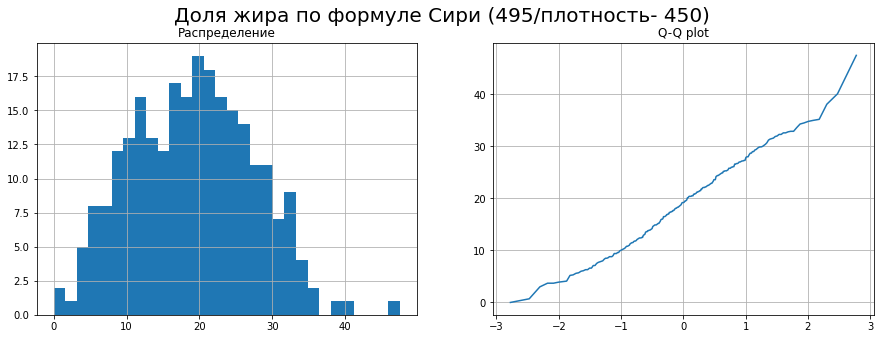

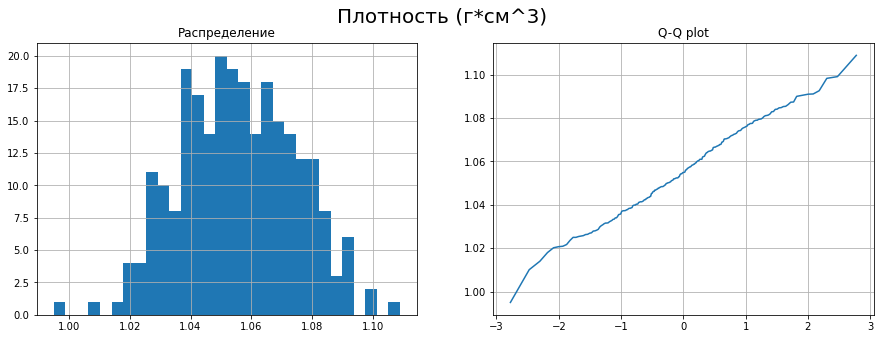

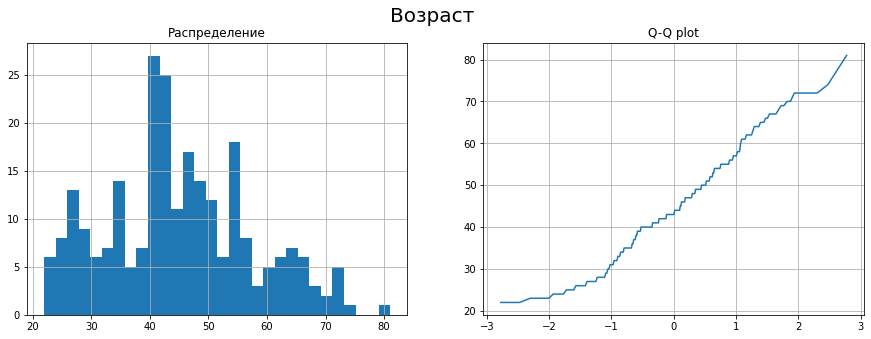

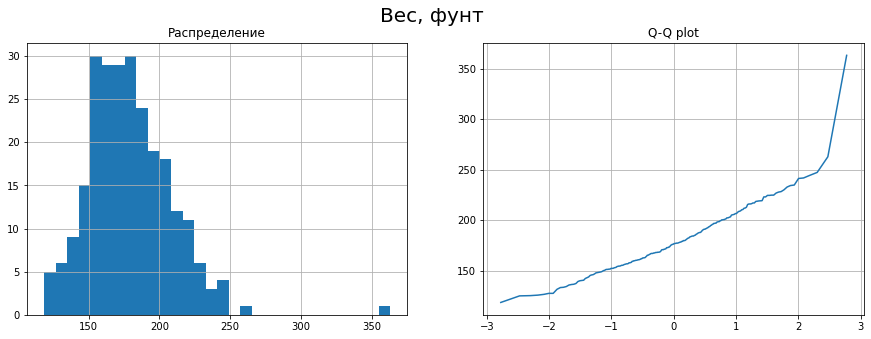

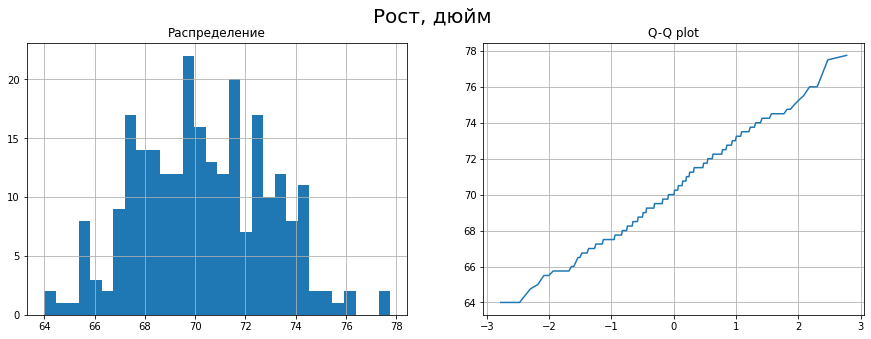

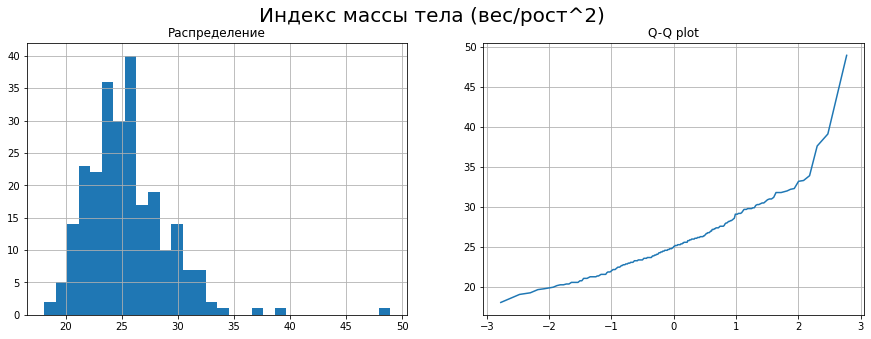

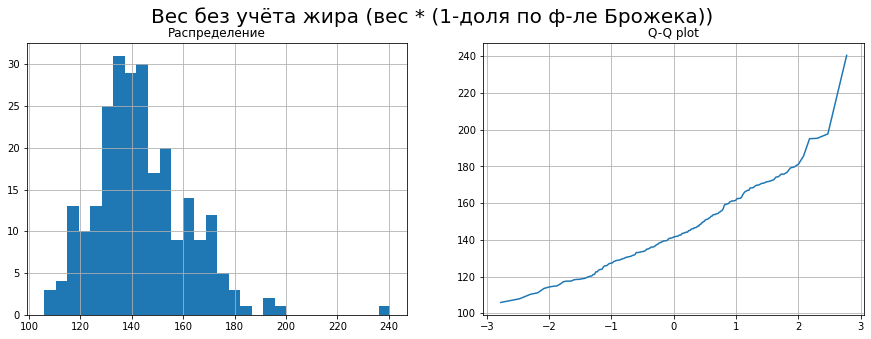

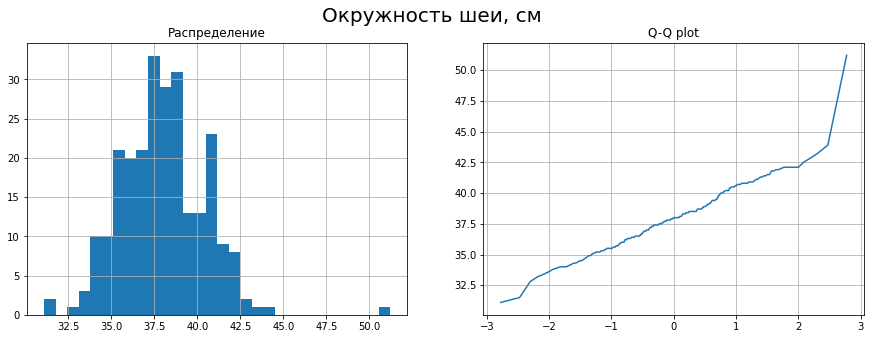

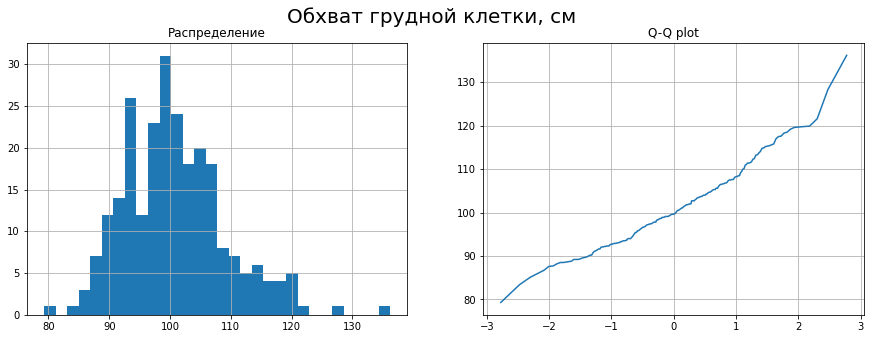

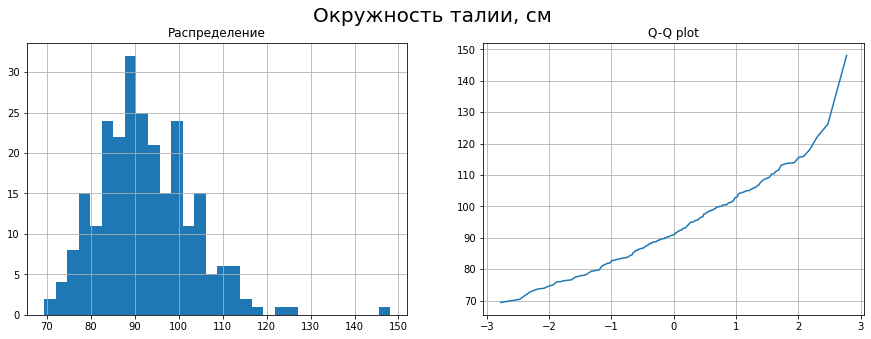

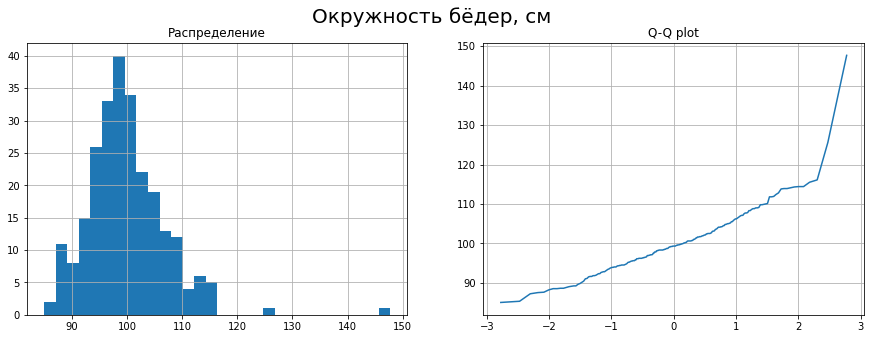

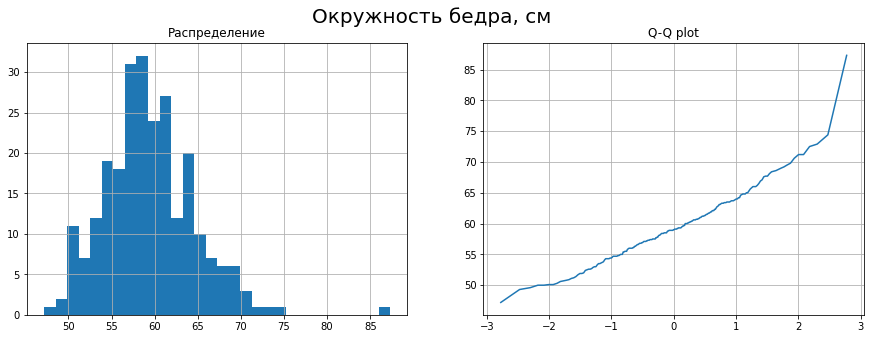

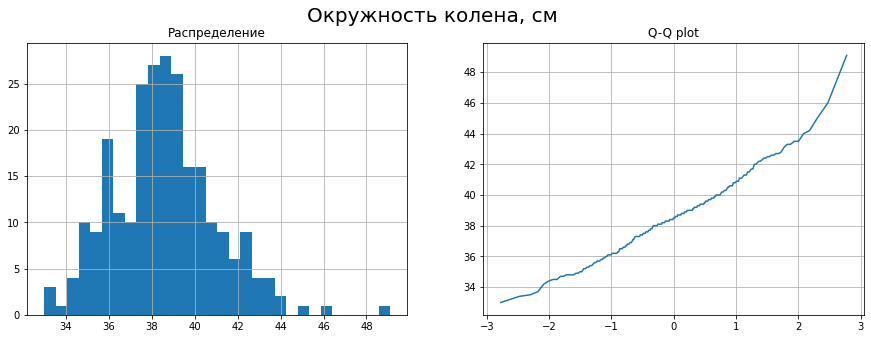

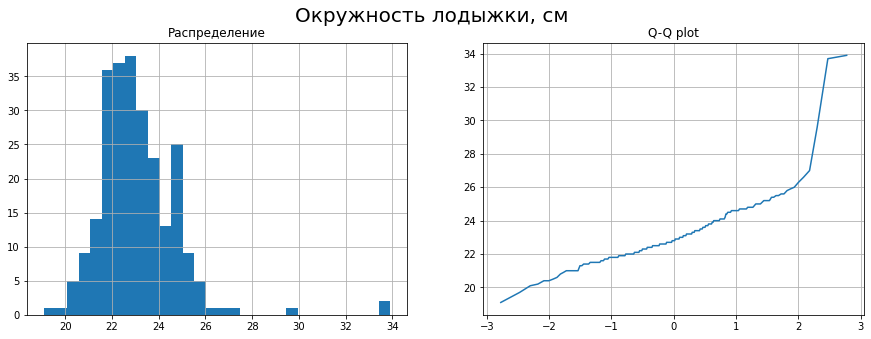

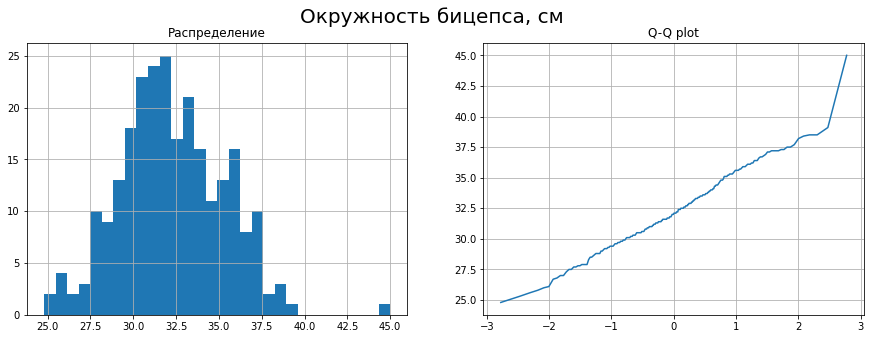

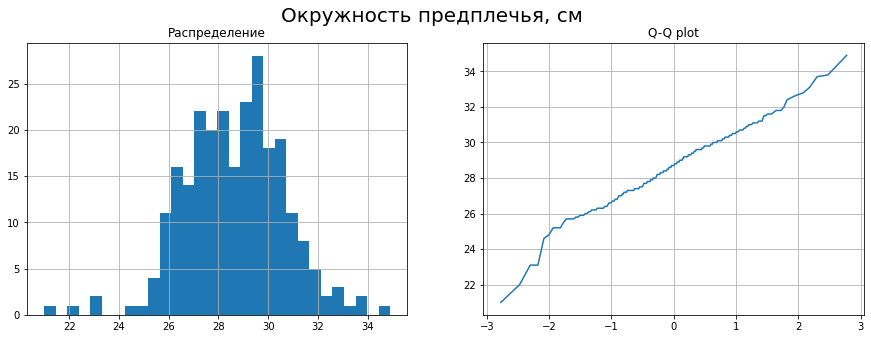

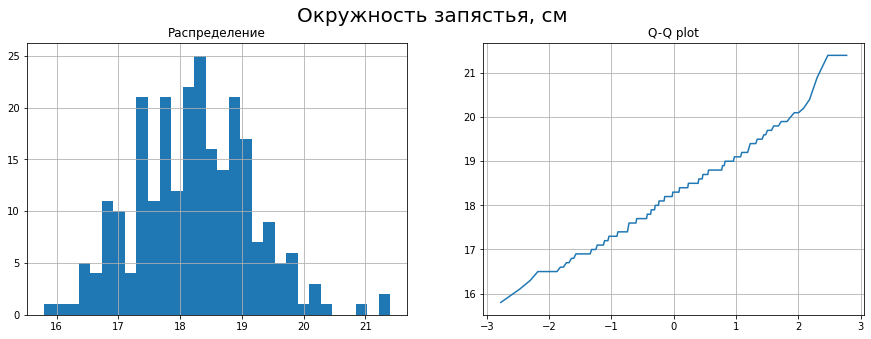

In [5]:
for col in list(df.columns)[1:]:    
    fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
    ax[0].hist(df[col], bins=30)
    ax[1].plot(*scipy.stats.probplot(np.array(df[col].T))[0])
    
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title('Распределение')
    ax[1].set_title('Q-Q plot')
    fig.suptitle(col, fontsize=20)
    plt.show()

#### Выводим показатели p-значений для критерия Шапиро-Уилка. Причина применения именно такого теста: среди других критериев проверки нормальности критерий Шапиро-Уилка наиболее мощный, а, значит, как правило, лучше других выявляет различия между нулевой и альтернативной гипотезами, и с меньшей вероятностью допускает ошибки второго рода. Из такой эффективности критерия Шапиро-Уилка следует что после его удачной проверки можно применять и более мощные критерии для анализа выборки, что, безусловно, хорошо, так как приведёт к более точным результатам.

In [77]:
print('%60s  :: p-value  :: p-value in scientific notation' % 'Наименование признака')
print(110 * '=')
for feature in df.columns[1:]:
    print('%60s  :: %f :: %.2E' % (feature, sc.stats.shapiro(df[feature])[1], sc.stats.shapiro(df[feature])[1]))

                                       Наименование признака  :: p-value  :: p-value in scientific notation
        Доля жира по формуле Брожека (457/плотность - 414.2)  :: 0.274703 :: 2.75E-01
              Доля жира по формуле Сири (495/плотность- 450)  :: 0.164926 :: 1.65E-01
                                          Плотность (г*см^3)  :: 0.657136 :: 6.57E-01
                                                     Возраст  :: 0.001043 :: 1.04E-03
                                                   Вес, фунт  :: 0.000000 :: 1.71E-08
                                                  Рост, дюйм  :: 0.237241 :: 2.37E-01
                              Индекс массы тела (вес/рост^2)  :: 0.000000 :: 9.96E-11
         Вес без учёта жира (вес * (1-доля по ф-ле Брожека))  :: 0.000001 :: 6.28E-07
                                          Окружность шеи, см  :: 0.000049 :: 4.92E-05
                                   Обхват грудной клетки, см  :: 0.000118 :: 1.18E-04
                                

#### Судя по выведенным статистикам (визуальным и числовым), можно сделать вывод, что признаки наблюдаемой выборки, как правило, распределены по закону, близкому к нормальному: 
* #### Гистограммы распределений похожи на нормальные (есть лишь один-два выброса на правом хвосте, которые делают его более тяжёлым, чем нужно для чистого нормального распределения);
* #### Кривые Q-Q plot для некоторых признаков близки к "диагональному" случаю (то есть распределение близко к нормальному). Для другой части признаков кривая имеет "диагональный" вид, но в самом правом конце сигнализирует о тяжёлом хвосте (это как раз из-за упомянутых выбросов);
* #### p-значения критерия Шапиро-Уилка для различных признаков показывает разные результаты. Напомним, что чем больше p-значения этого теста, тем "больше шанс" принятия гипотезы о нормальности распределения. Например, для признаков: Окружность бицепса, Окружность предплечья, Окружность запястья, Рост, Плотность, Доли жира (2 варианта) критерий явно предполагает нормальность их распределения. Для остальных признаков p-значений меньше, но это связано с наличием "выбросов" в выборке.

#### Таким образом, прослеживается нормальность некоторых признаков. Нормальному распределению других признаков мешают объекты с нетипичными для выборки значениями (утяжеляющие правый хвост). Покажем, что ситуацию можно облегчить, если выкинуть всего один нетипичный объект.

In [11]:
df_without_outlier = df.loc[df['Вес, фунт'] < 350]

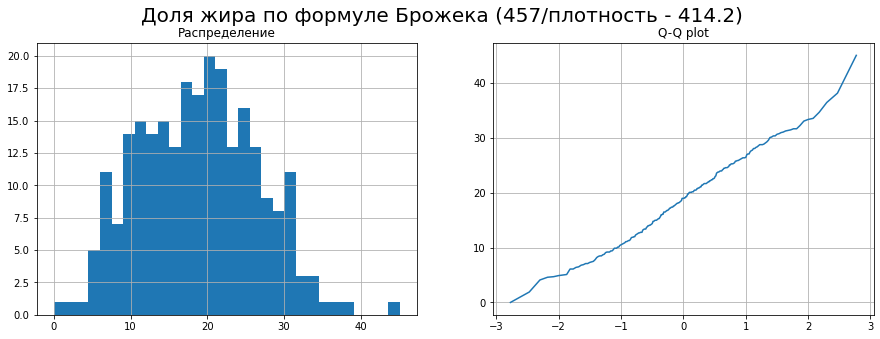

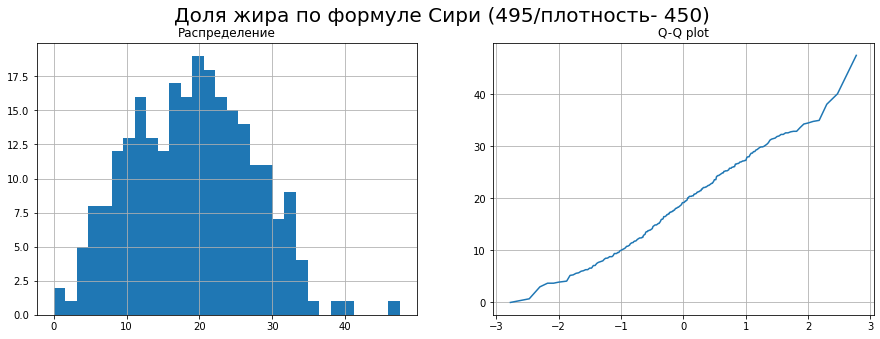

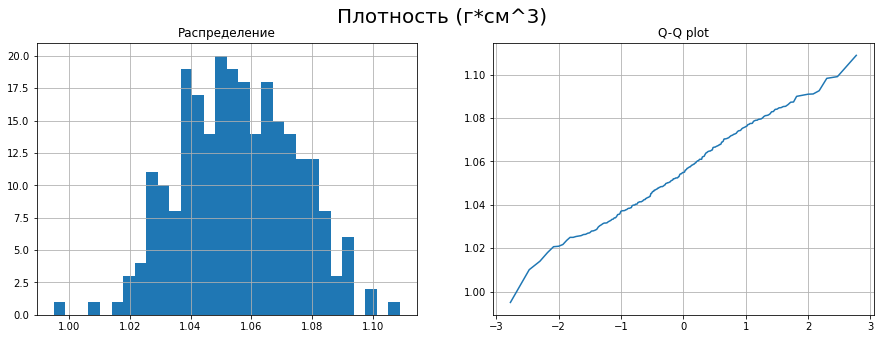

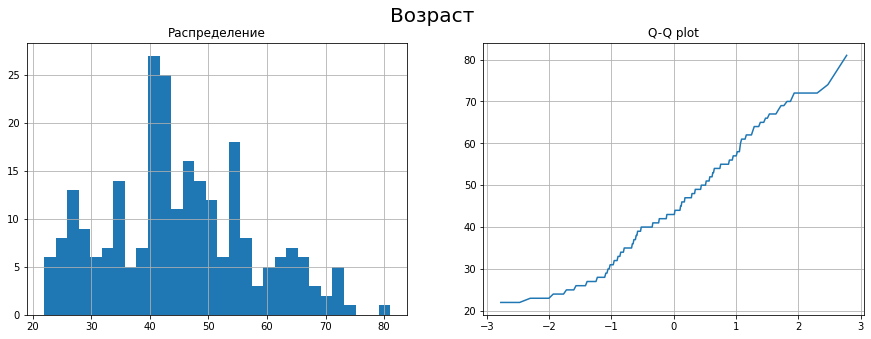

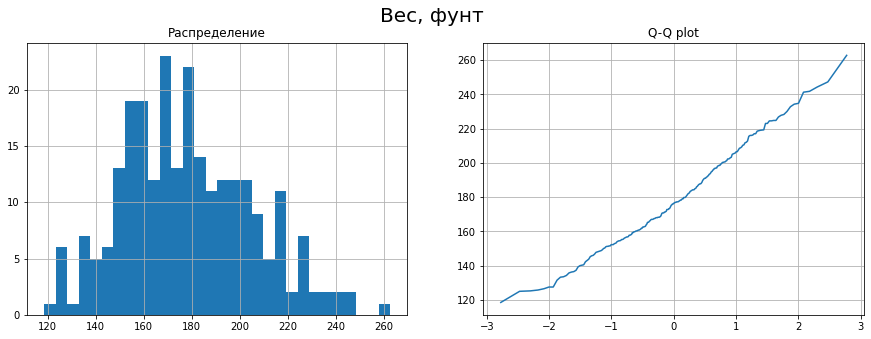

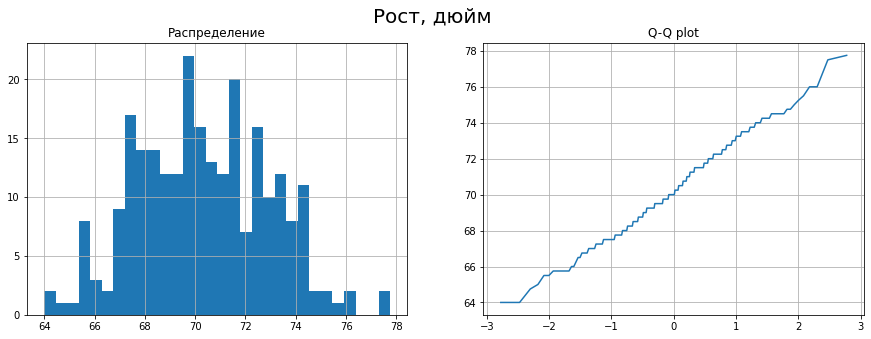

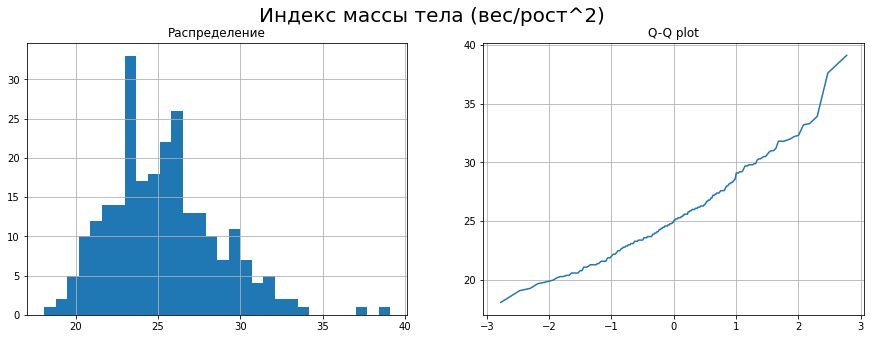

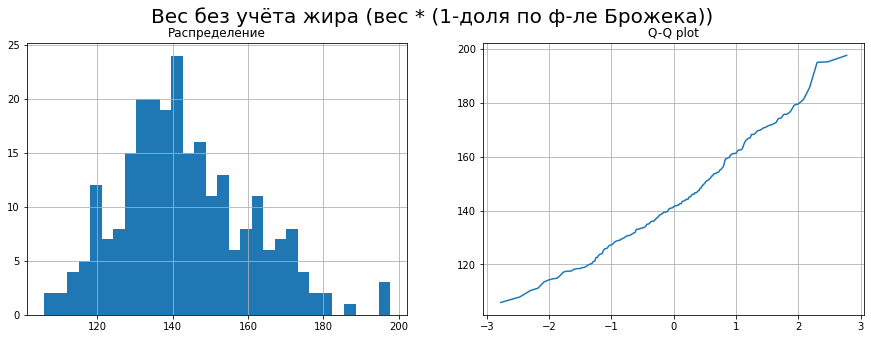

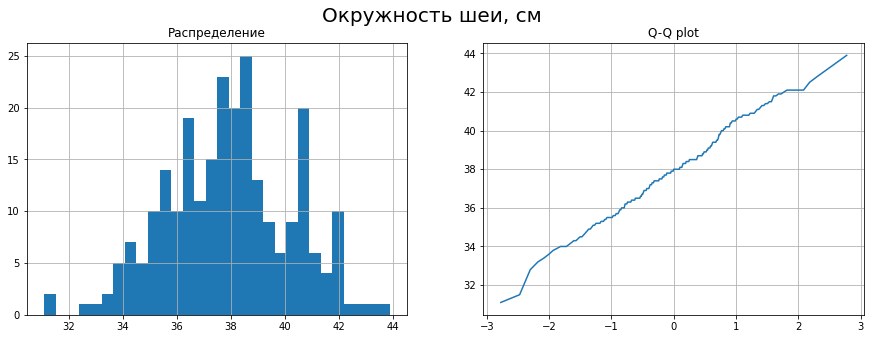

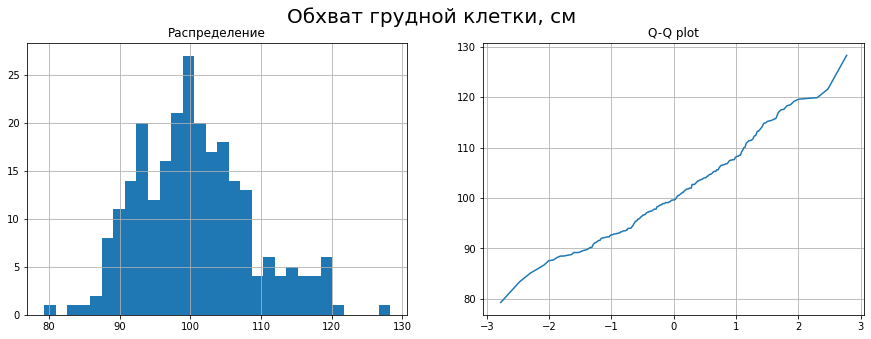

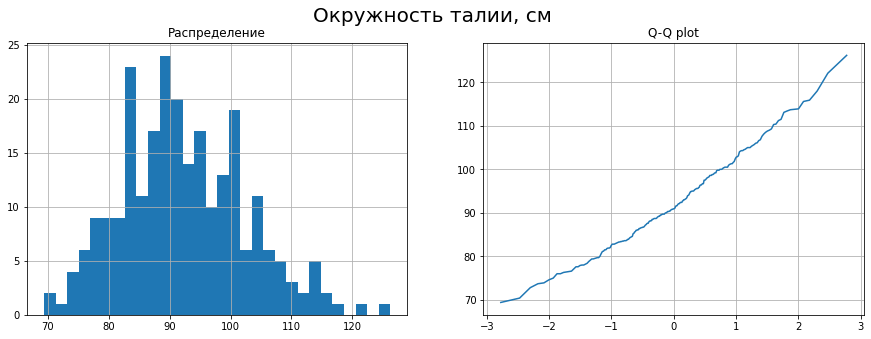

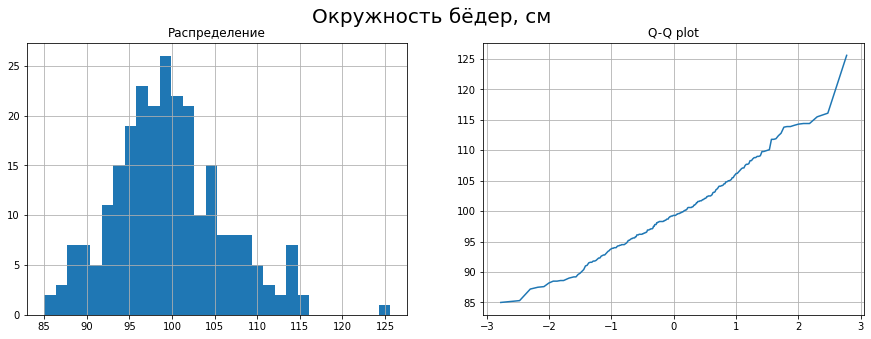

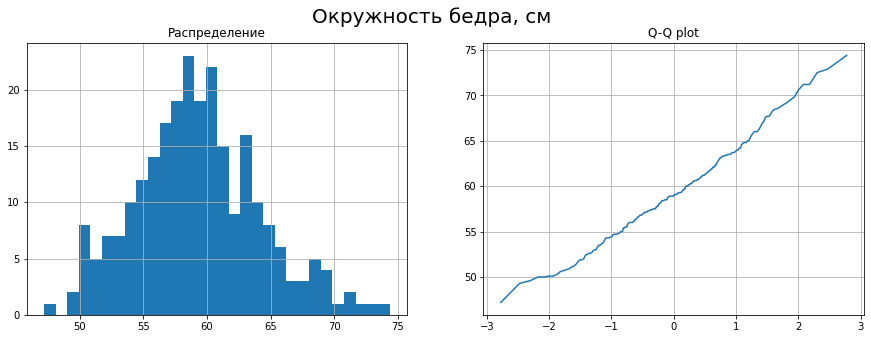

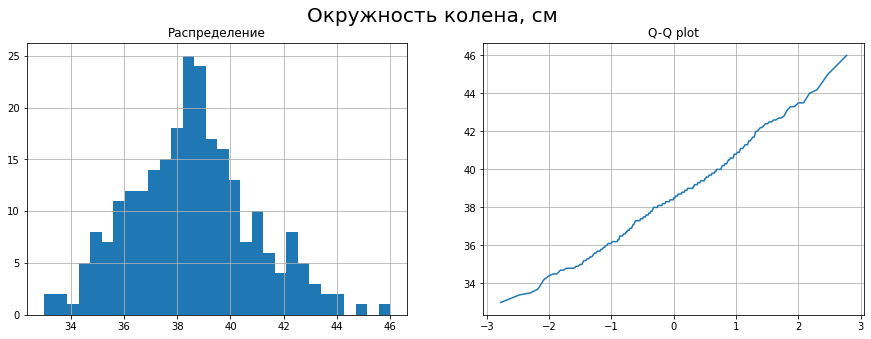

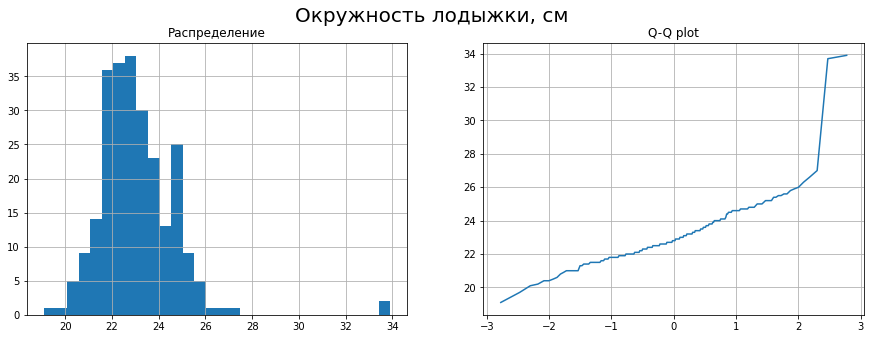

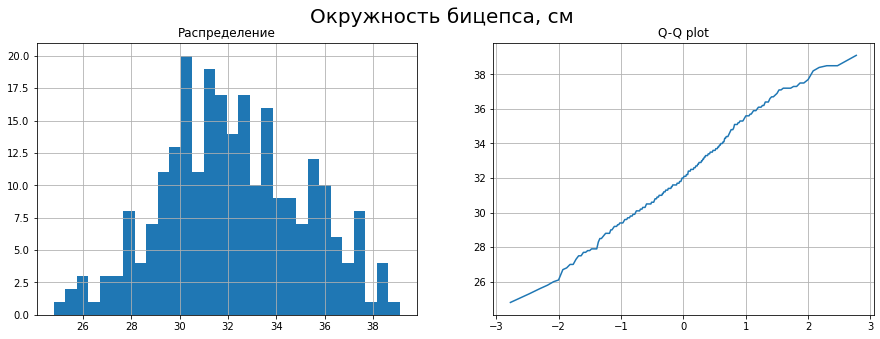

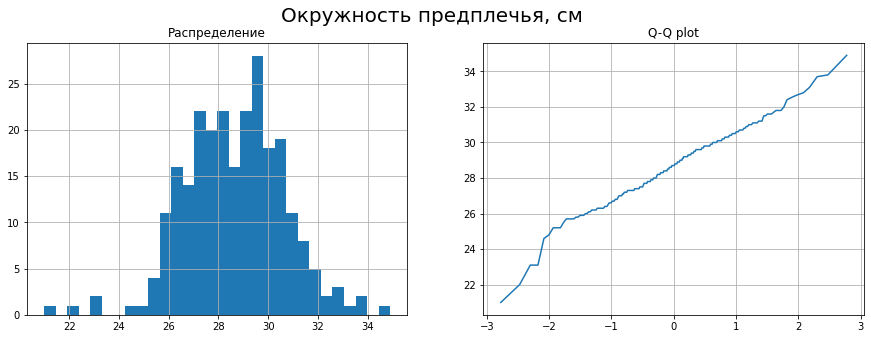

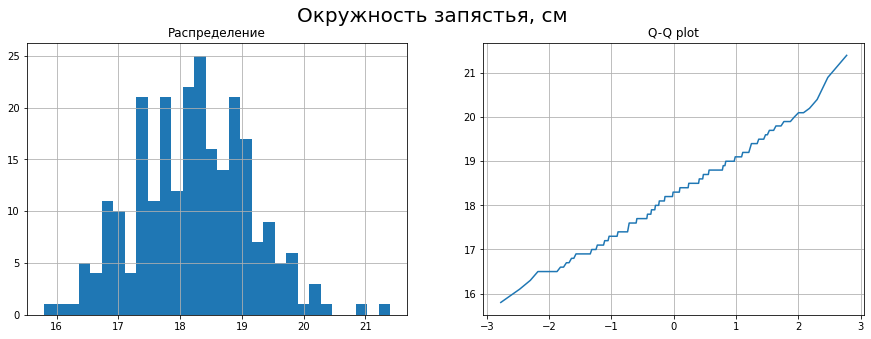

In [12]:
for col in list(df.columns)[1:]:
    fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
    ax[0].hist(df_without_outlier[col], bins=30)
    ax[1].plot(*scipy.stats.probplot(np.array(df_without_outlier[col].T))[0])
    
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title('Распределение')
    ax[1].set_title('Q-Q plot')
    fig.suptitle(col, fontsize=20)
    plt.show()

In [87]:
print('%60s  :: p-value  :: p-value in scientific notation' % 'Наименование признака')
print(110 * '=')
for feature in df.columns[1:]:
    print('%60s  :: %f :: %.2E' % (feature, 
                                   sc.stats.shapiro(df_without_outlier[feature])[1], 
                                   sc.stats.shapiro(df_without_outlier[feature])[1]))

                                       Наименование признака  :: p-value  :: p-value in scientific notation
        Доля жира по формуле Брожека (457/плотность - 414.2)  :: 0.266222 :: 2.66E-01
              Доля жира по формуле Сири (495/плотность- 450)  :: 0.157614 :: 1.58E-01
                                          Плотность (г*см^3)  :: 0.635406 :: 6.35E-01
                                                     Возраст  :: 0.001015 :: 1.02E-03
                                                   Вес, фунт  :: 0.032161 :: 3.22E-02
                                                  Рост, дюйм  :: 0.234165 :: 2.34E-01
                              Индекс массы тела (вес/рост^2)  :: 0.000038 :: 3.83E-05
         Вес без учёта жира (вес * (1-доля по ф-ле Брожека))  :: 0.001600 :: 1.60E-03
                                          Окружность шеи, см  :: 0.405986 :: 4.06E-01
                                   Обхват грудной клетки, см  :: 0.003159 :: 3.16E-03
                                

#### Как видно, уже большинство признаков в полученной выборке распределено по нормальному закону: графики более менее выровнялись, p-значения критерия Шапиро-Уилка для некоторых признаков подросли (теперь большинство признаков имеют подтверждённое нормальное распределение).

#### Таким образом, можно в дальнейшем анализе учитывать, что распределение большинства признаков близко к нормальному. Для уровня значимости 0.001 остаются под вопросом нормальности только признаки Индекс массы тела и Окружность лодыжки, однако, как видно из их Q-Q plot отдаление от нормального случая происходит из-за наличия нескольких объектов, отяжеляющих правый хвост. Можно считать, что в области основной вероятностной массы данные переменные распределены нормально.

#### Кроме того безусловно можно вспомнить про трансформацию данных, например, методом Бокса-Кокса. Однако для данной задачи это не обязательно - данные уже распределены близко к нормальному закону, и, кроме того, преобразования признаков могут потерять свою интерпретируемость. Но ради демонстрации эффективности преобразования Бокса-Кокса приведём результаты критерия Шапиро-Уилка и для него. В дальнейшем будем работать с исходными признаками.

In [89]:
print('%60s  :: p-value  :: p-value in scientific notation' % 'Наименование признака')
print(110 * '=')
for feature in df.columns[1:]:
    print('%60s  :: %f :: %.2E' % (feature, 
                                   sc.stats.shapiro(scipy.stats.boxcox(df[feature]+1e-8)[0])[1],
                                   sc.stats.shapiro(scipy.stats.boxcox(df[feature]+1e-8)[0])[1]))

                                       Наименование признака  :: p-value  :: p-value in scientific notation
        Доля жира по формуле Брожека (457/плотность - 414.2)  :: 0.190173 :: 1.90E-01
              Доля жира по формуле Сири (495/плотность- 450)  :: 0.134115 :: 1.34E-01
                                          Плотность (г*см^3)  :: 0.660450 :: 6.60E-01
                                                     Возраст  :: 0.005528 :: 5.53E-03
                                                   Вес, фунт  :: 0.299098 :: 2.99E-01
                                                  Рост, дюйм  :: 0.309065 :: 3.09E-01
                              Индекс массы тела (вес/рост^2)  :: 0.791338 :: 7.91E-01
         Вес без учёта жира (вес * (1-доля по ф-ле Брожека))  :: 0.729230 :: 7.29E-01
                                          Окружность шеи, см  :: 0.011485 :: 1.15E-02
                                   Обхват грудной клетки, см  :: 0.816587 :: 8.17E-01
                                

#### Разделим данные на две категории:
* #### Простые антропологические признаки (feats_1);
* #### Величины обхватов (feats_2);

#### По условию поставленной задачи необходимо проанализировать, как связаны признаки между этими двумя группами. Поэтому признаки внутри одной группы не будут сравниваться между собой - рассмотрим только пары признаков, где каждый признак из своей группы.

In [15]:
feats_1 = [
    'Доля жира по формуле Брожека (457/плотность - 414.2)',
    'Доля жира по формуле Сири (495/плотность- 450)', 
    'Плотность (г*см^3)',
    'Возраст', 
    'Вес, фунт', 
    'Рост, дюйм', 
    'Индекс массы тела (вес/рост^2)',
    'Вес без учёта жира (вес * (1-доля по ф-ле Брожека))']

feats_2 = [
    'Окружность шеи, см', 
    'Обхват грудной клетки, см',
    'Окружность талии, см', 
    'Окружность бёдер, см', 
    'Окружность бедра, см',
    'Окружность колена, см', 
    'Окружность лодыжки, см',
    'Окружность бицепса, см', 
    'Окружность предплечья, см',
    'Окружность запястья, см'
]

#### Посмотрим на коэффициент корреляции между всеми парами признаков из разных групп. Начнём с коэффициента корреляции Пирсона, как одного из самых основных коэффициентов для анализа линейной взаимосвязи между признаками.

#### Применение коэффициента корреляции Пирсона корректно, так как выполнены все ограничения накладываемые на выборки признаков (в том числе и нормальность их распределения, к которой мы пришли ранее). Отметим, что среди минусов коэффициента корреляции Пирсона есть неустойчивость к выбросам. 

#### Интересное наблюдение: ранее при анализе нормальности распределений признаков было указано, что несколько объектов может нарушать нормальность распределения (по сути они являлись нетипичными объектами в генеральной совокупности, и портили картину, то есть, можно сказать, являлись выбросами). Однако при анализе линейной зависимости между признаками не имеет смысла выкидывать эти объекты:
* #### Для нетипичных объектов различные показатели выделятся одинаковым образом (вес, индекс массы тела - почти все признаки больше на одну и ту же пропроциональну добавку относительно других объектов наблдаемой выборки). То есть, в целом, они не нарушают линейность.
* #### Как следствие, не будет существенных изменений в матрице корреляций.

#### То есть объекты, которые можно было посчитать выбросами в задаче анализа на нормальность, не являтся выбросами (объектами, путающими результаты) при анализе корреляций.

#### Для начала выведем корреляционные матрицы между признаками одной группы (отдельно для антропологических признаков, и отдельно для обхватов). Это может быть полезно для упрощения анализа: если пара признаков одной группы (очень) сильно коррелирует, то один из признаков можно не учитывать, так как все получаемые в дальнейшем результаты будут практически одинаковыми.

In [16]:
corr = np.corrcoef(df[feats_1].T)
corr = np.abs(corr)
corr = corr

pd.DataFrame(corr,
             columns = feats_1,
             index = feats_1
            ).style.background_gradient(cmap='Reds', axis=None)

#### Для антропологических признаков наблюдается очень сильная корреляция между долями жира и плотностью. В принципе, как было написано выше, можно оставить из них только один признак - это поможет сделать анализ более компактным (в дальнейших экспериментах для них результаты будут практически одинаковыми, так как они связаны сильной линейной зависимостью). (Но мы выкидывать не будем).

In [17]:
corr = np.corrcoef(df[feats_2].T)
corr = np.abs(corr)
corr = corr

pd.DataFrame(corr,
             columns = feats_2,
             index = feats_2
            ).style.background_gradient(cmap='Reds', axis=None)

#### Для группы признаков-обхватов есть и сильные корреляции между признаками (значения 0.8-0.9), но нельзя сказать, что признаки практически одинаковые (с точностью до линейного преобразования), как было для антропологических признаков. Здесь лучше ничего не выкидывать из рассмотрения.

#### Дополнительно отметим, что признаки-обхваты коррелируют друг с другом более менее одинаково - почти все значения корреляции находятся на уровнях от средних до значительных, в отличие от рассматриваемых антропологических признаков (прошлая таблица корреляций), где значения признаков могли коррелировать как очень слабо (порядка сотых и тысячных значений для коэффициентов корреляции Пирсона), так и очень сильно (0.7-0.9). Со второй группой - обхватами - ситуация "стабильнее", что логично.

### Наконец, выведем корреляционную матрицу между признаками разных групп:

In [99]:
def my_pearsonr(data):
    feats = list(data.columns)
    corr = pd.DataFrame(np.empty((len(feats), len(feats))))
    pval = pd.DataFrame(np.empty((len(feats), len(feats))))
    
    for i in range(len(feats)):
        for j in range(i, len(feats)):
            corr_ij, pval_ij = scipy.stats.pearsonr(data.iloc[:, i], data.iloc[:, j])
            corr.iloc[i, j] = corr_ij
            pval.iloc[i, j] = pval_ij
            
            corr.iloc[j, i] = corr_ij
            pval.iloc[j, i] = pval_ij

    return np.array(corr), np.array(pval)

### Матрицы коэффициентов Пирсона и соответствующих p-значений:

In [100]:
corr, pval = my_pearsonr(df[feats_1 + feats_2])
corr = np.abs(corr)
corr = corr[:len(feats_1), -len(feats_2):]

pval = pval[:len(feats_1), -len(feats_2):]

display(pd.DataFrame(corr,
             columns = feats_2,
             index = feats_1
            ).style.background_gradient(cmap='Reds', axis=None))

display(pd.DataFrame(pval,
             columns = feats_2,
             index = feats_1
            ).style.background_gradient(cmap='Blues', axis=None))

### Заодно выведем матрицы коэффициентов Спирмена и соответствующих p-значений для анализа монотонной взаимосвязи между признаками. Получатся примерно такие же результаты:

In [101]:
corr, pval = scipy.stats.spearmanr(df[feats_1 + feats_2])
corr = np.abs(corr)[:len(feats_1), -len(feats_2):]
pval = pval[:len(feats_1), -len(feats_2):]

display(pd.DataFrame(corr,
             columns=feats_2,
             index=feats_1
            ).style.background_gradient(cmap='Reds', axis=None))

display(pd.DataFrame(pval,
             columns=feats_2,
             index=feats_1
            ).style.background_gradient(cmap='Blues', axis=None))

#### Сделаем несколько выводов из полученных корреляционных статистик.
#### Во первых, порядковые корреляции (через коэффициент Кенделла) практически совпадают с обычными линейными (коэффициентом Пирсона). Во-вторых, полученные p-значения в большинстве случаев принимают малые значения, а поэтому большинство полученных результатов можно считать статистически значимыми.
#### Что касается самого характера зависимости, то видно, что наиболее сильная линейная/монотонная зависимость обхватов наблюдается с весом и индексом массы тела человека. Слабее всего на величину обхвата влияет возраст, однако и статистическая значимость этого утверждения небольшая (для объёма и особенностей данной наблюдаемой выборки). Также из рассматриваемых типов обхватов с антропологическими признаками наиболее согласуется окружность талии, наиболее слабая корреляция антропологических признаков - с окружностью лодыжки. В целом, можно считать, что для большинства антропологических признаков корреляция собхватами значительна.

#### Отдельно отметим факт из предыдущего этапа исследования: признаки Доли жира и Плотность (между которыми корреляция была практически единичной) ведут себя практически одинаково.

#### Выведем несколько совместных распределений на признаках.

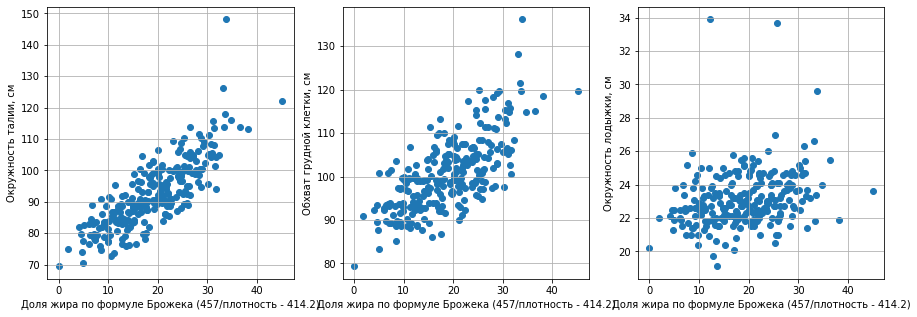

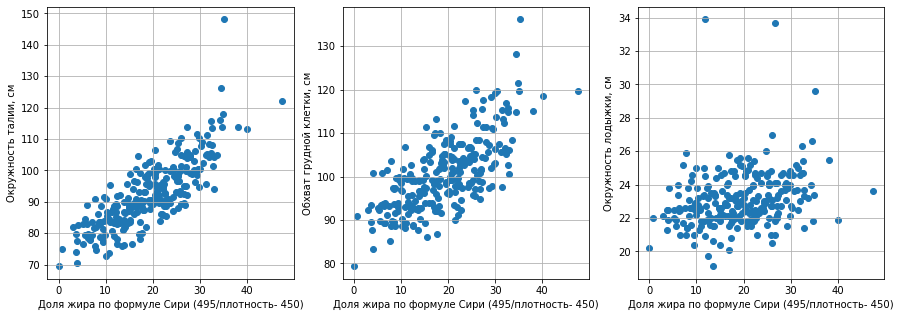

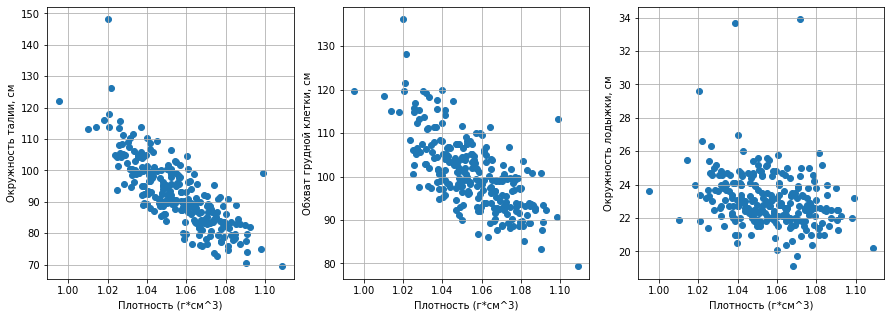

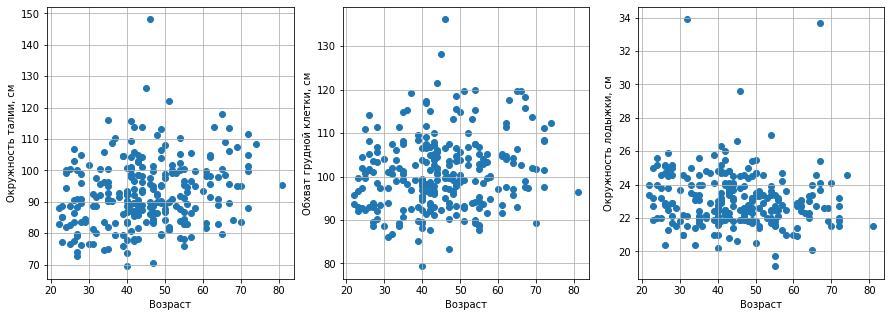

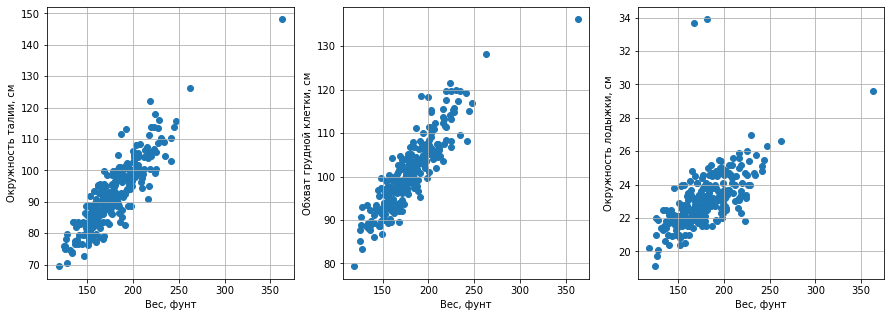

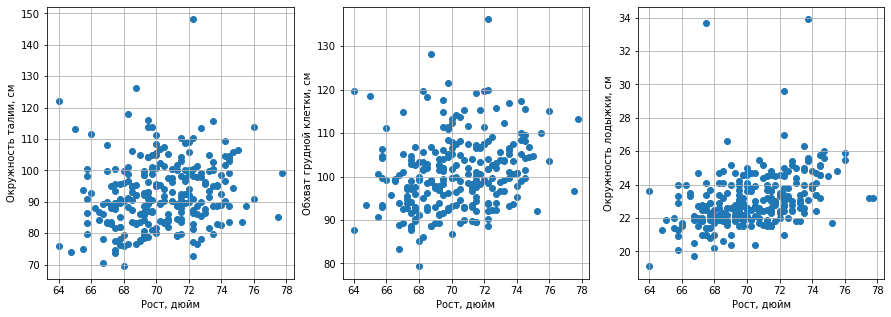

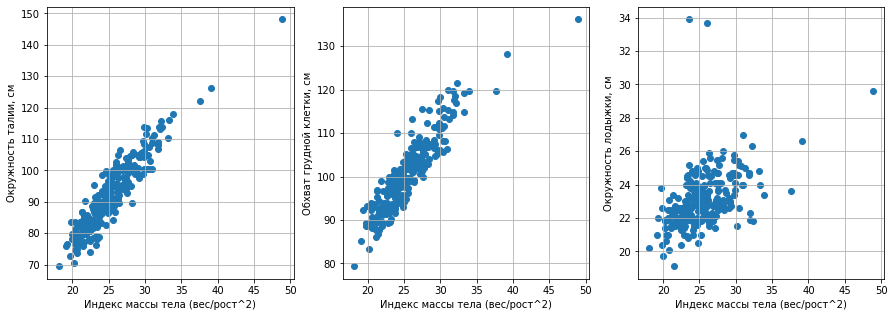

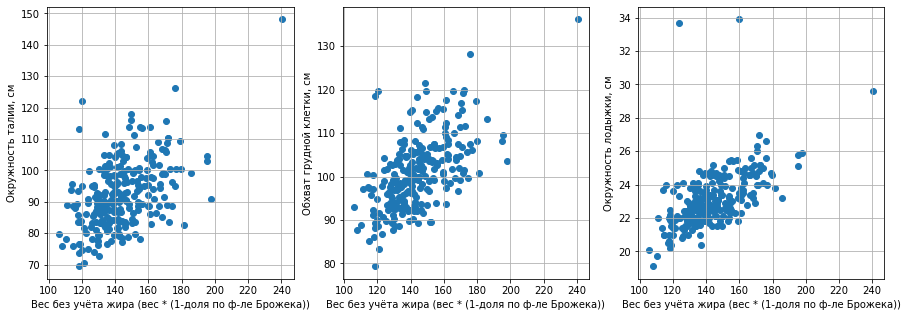

In [22]:
for i in range(len(feats_1)):
    fig, ax = plt.subplots(figsize=(15, 5), ncols=3)

    ax[0].scatter(df[feats_1[i]], df['Окружность талии, см'])
    ax[0].set_xlabel(feats_1[i])
    ax[0].set_ylabel('Окружность талии, см')
    ax[0].grid()
    
    ax[1].scatter(df[feats_1[i]], df['Обхват грудной клетки, см'])
    ax[1].set_xlabel(feats_1[i])
    ax[1].set_ylabel('Обхват грудной клетки, см')
    ax[1].grid()
    
    ax[2].scatter(df[feats_1[i]], df['Окружность лодыжки, см'])
    ax[2].set_xlabel(feats_1[i])
    ax[2].set_ylabel('Окружность лодыжки, см')
    ax[2].grid()

#### Видно, что в некоторых случаях корреляция может быть немного ослаблена выбросами, однако это не сильно влияет на результат.

#### Проведём ещё небольшое исследование. Так как в результате корреляционного анализа было выявлено, что в данной выборке наислабейшей корреляционной зависимостью от обхватов обладает возраст, то проведём более подробное сравнение этого признака с обхватами.

#### Для начала покажем, что возраст действительно влияет на показатели обхватов. Для этого разделим выборку на две части по медиане возраста наблюдаемых (что аналогично бинаризации признака) и сравним выборки по одному из признаков обхвата (например, окружность талии):

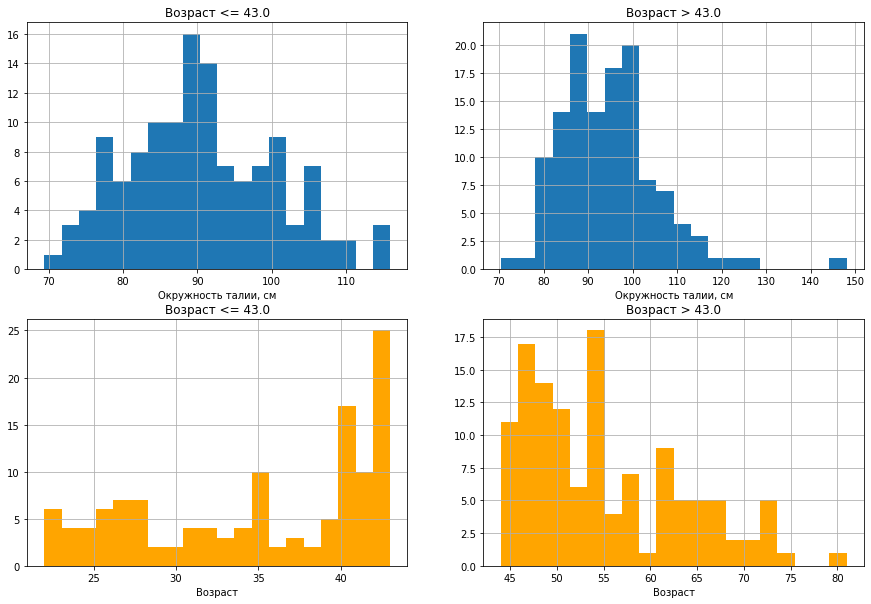

In [172]:
fig, ax = plt.subplots(figsize=(15, 10), ncols=2, nrows=2)

ax[0][0].hist(df.loc[df['Возраст'] <= df['Возраст'].median(), 'Окружность талии, см'], bins=20);
ax[0][1].hist(df.loc[df['Возраст'] > df['Возраст'].median(), 'Окружность талии, см'], bins=20);
ax[1][0].hist(df.loc[df['Возраст'] <= df['Возраст'].median(), 'Возраст'], bins=20, color='orange');
ax[1][1].hist(df.loc[df['Возраст'] > df['Возраст'].median(), 'Возраст'], bins=20, color='orange');

ax[0][0].set_title('Возраст <= '+str(df['Возраст'].median()))
ax[0][1].set_title('Возраст > '+str(df['Возраст'].median()))
ax[1][0].set_title('Возраст <= '+str(df['Возраст'].median()))
ax[1][1].set_title('Возраст > '+str(df['Возраст'].median()))
ax[0][0].set_xlabel('Окружность талии, см')
ax[0][1].set_xlabel('Окружность талии, см')
ax[1][0].set_xlabel('Возраст')
ax[1][1].set_xlabel('Возраст')
ax[0][0].grid()
ax[0][1].grid()
ax[1][0].grid()
ax[1][1].grid()

#### Можно сравнить средние значения и медианы:

In [193]:
print(
    '%30s %2.1f \n%30s %2.1f' %
    (
        'Waist median of Children:',
        df.loc[df['Возраст'] <= df['Возраст'].median(), 'Окружность талии, см'].median(),
        'Waist median of Adults:',
        df.loc[df['Возраст'] > df['Возраст'].median(), 'Окружность талии, см'].median()
    )
)


print(
    '%30s %2.1f \n%30s %2.1f' %
    (
        'Waist mean of Children:',
        df.loc[df['Возраст'] <= df['Возраст'].median(), 'Окружность талии, см'].mean(),
        'Waist mean of Adults:',
        df.loc[df['Возраст'] > df['Возраст'].median(), 'Окружность талии, см'].mean()
    )
)

     Waist median of Children: 89.7 
       Waist median of Adults: 94.0
       Waist mean of Children: 90.5 
         Waist mean of Adults: 94.7


#### Вычислим доверительный интервал для среднего значения окружности талии для "малой возрастной группы". Визуально можно определить, что её распределение близко к нормальному.

In [204]:
df_little = df.loc[df['Возраст'] <= df['Возраст'].median(), 'Окружность талии, см']

m = df_little.mean() 
s = df_little.std() 
dof = len(df_little) - 1 
confidence = 0.95

t_crit = np.abs(scipy.stats.t.ppf((1-confidence)/2,dof))   
print('Доверительный интервал для среднего первой подвыборки: ('+
      str(round(m-s*t_crit/np.sqrt(len(df_little)), 2))+', '+ 
      str(round(m+s*t_crit/np.sqrt(len(df_little)), 2)) + ')')

Доверительный интервал для среднего первой подвыборки: (88.73, 92.21)


#### Как видно, с 95% доверия среднее значение второй подвыборки не попадает доверительный первой. Средние и медианы подвыборок заметно отличаются. Это же можно подтвердить, воспользовавшись критериями Стьюдента и Манна-Уитни (можно считать, что данные удоалветворяют необходимым требованиям их применения):

In [217]:
print('%50s %f' % ('p-value for t-rest (two-sided):',
scipy.stats.ttest_ind(df.loc[df['Возраст'] <= df['Возраст'].median(), 'Окружность талии, см'],
                      df.loc[df['Возраст'] > df['Возраст'].median(), 'Окружность талии, см'])[1]))

print('%50s %f' % ('p-value for t-rest (greater alternative):',
scipy.stats.ttest_ind(df.loc[df['Возраст'] <= df['Возраст'].median(), 'Окружность талии, см'],
                      df.loc[df['Возраст'] > df['Возраст'].median(), 'Окружность талии, см'],
                      alternative='greater')[1]))

print('%50s %f' % ('p-value for t-rest (less alternative):',
scipy.stats.ttest_ind(df.loc[df['Возраст'] <= df['Возраст'].median(), 'Окружность талии, см'],
                      df.loc[df['Возраст'] > df['Возраст'].median(), 'Окружность талии, см'],
                      alternative='less')[1]))




print('%50s %f' % ('p-value for Mann-Whitneyu (two-sided):',
scipy.stats.mannwhitneyu(df.loc[df['Возраст'] <= df['Возраст'].median(), 'Окружность талии, см'],
                         df.loc[df['Возраст'] > df['Возраст'].median(), 'Окружность талии, см'])[1]))

print('%50s %f' % ('p-value for Mann-Whitneyu (greater alternative):',
scipy.stats.mannwhitneyu(df_without_outlier.loc[df_without_outlier['Возраст'] <= df_without_outlier['Возраст'].median(), 'Окружность талии, см'],
                         df_without_outlier.loc[df_without_outlier['Возраст'] > df_without_outlier['Возраст'].median(), 'Окружность талии, см'],
                         alternative='greater')[1]))

print('%50s %f' % ('p-value for Mann-Whitneyu (less alternative):',
scipy.stats.mannwhitneyu(df_without_outlier.loc[df_without_outlier['Возраст'] <= df_without_outlier['Возраст'].median(), 'Окружность талии, см'],
                         df_without_outlier.loc[df_without_outlier['Возраст'] > df_without_outlier['Возраст'].median(), 'Окружность талии, см'],
                         alternative='less')[1]))

                   p-value for t-rest (two-sided): 0.001803
         p-value for t-rest (greater alternative): 0.999098
            p-value for t-rest (less alternative): 0.000902
            p-value for Mann-Whitneyu (two-sided): 0.004918
  p-value for Mann-Whitneyu (greater alternative): 0.996742
     p-value for Mann-Whitneyu (less alternative): 0.003276


#### Видно, что гипотеза о равенстве средних значений по подвыборкам отвергается в пользу односторонней (less) альтернативе. Можно сравнить и медианы выборок с помощью критерия Краскела — Уоллиса (для двух выборок):

In [219]:
print('%50s %f' % ('p-value for Kruskal-Wallis (two-sided):',
scipy.stats.kruskal(df.loc[df['Возраст'] <= df['Возраст'].median(), 'Окружность талии, см'],
                    df.loc[df['Возраст'] > df['Возраст'].median(), 'Окружность талии, см'])[1]))

           p-value for Kruskal-Wallis (two-sided): 0.004905


#### Гипотеза о равенстве медиан должна быть отвергнута. Таким образом, основные центральные статистики для признака окружности талии меняются в зависимости от возраста. Наконец, воспользуемся критерием Колмогорова-Смирнова, чтобы сравнить распределения подвыборок в целом:

In [229]:
print('%50s %f' % ('p-value for Kolmogorov-Smirnov:',
scipy.stats.kstest(df.loc[df['Возраст'] <= df['Возраст'].median(), 'Окружность талии, см'],
                    df.loc[df['Возраст'] > df['Возраст'].median(), 'Окружность талии, см'])[1]))

                   p-value for Kolmogorov-Smirnov: 0.012358


#### Полученное p-значение мало: порядка 0.01. Следовательно можем заключить, что подвыборки получены из раздичных генеральных совокупностей. Таким образом, возраст напрямую влияет на показания обхвата талии (чтобы не загромождать ноутбук лишь устно уточним, что подобную процедуру с аналогичными результатами можно провести для других типов обхватов).

#### Рассмотрим ещё один небольшой эксперимент. Разобьём объекты по возрасту на 5 групп и посмотрим на соотношение между их медианами и средними.

In [163]:
perc = np.percentile(df[['Возраст']], np.arange(0, 100, 20))
perc

array([22., 34., 41., 47., 55.])

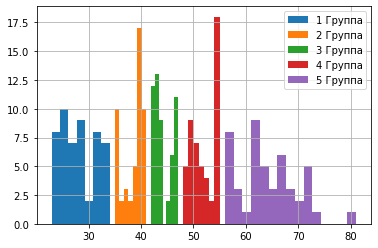

In [265]:
plt.hist(df.loc[(df['Возраст'] > perc[0]) & 
                (df['Возраст'] <= perc[1]), 'Возраст'], bins=7, label='1 Группа');
plt.hist(df.loc[(df['Возраст'] > perc[1]) & 
                (df['Возраст'] <= perc[2]), 'Возраст'], bins=7, label='2 Группа');
plt.hist(df.loc[(df['Возраст'] > perc[2]) & 
                (df['Возраст'] <= perc[3]), 'Возраст'], bins=7, label='3 Группа');
plt.hist(df.loc[(df['Возраст'] > perc[3]) & 
                (df['Возраст'] <= perc[4]), 'Возраст'], bins=7, label='4 Группа');
plt.hist(df.loc[(df['Возраст'] > perc[4]), 'Возраст'], bins=15, label='5 Группа');
plt.grid()
plt.legend();

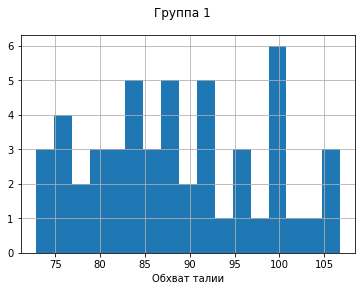

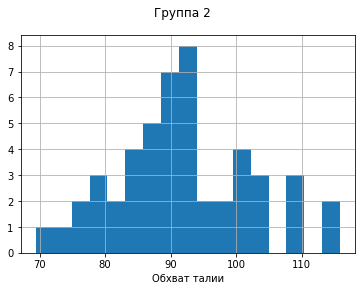

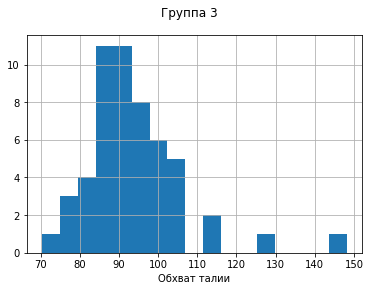

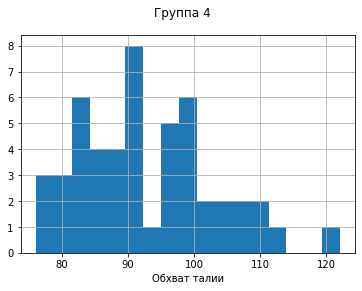

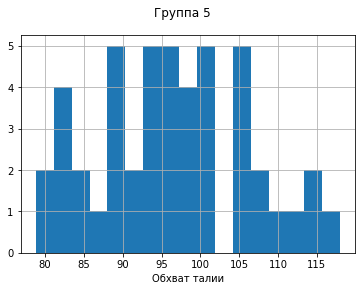

In [295]:
plt.hist(df.loc[(df['Возраст'] > perc[0]) & 
                (df['Возраст'] <= perc[1]), 'Окружность талии, см'], bins=17);
plt.xlabel('Обхват талии')
plt.suptitle('Группа 1')
plt.grid()
plt.show()

plt.hist(df.loc[(df['Возраст'] > perc[1]) & 
                (df['Возраст'] <= perc[2]), 'Окружность талии, см'], bins=17);
plt.xlabel('Обхват талии')
plt.suptitle('Группа 2')
plt.grid()
plt.show()

plt.hist(df.loc[(df['Возраст'] > perc[2]) & 
                (df['Возраст'] <= perc[3]), 'Окружность талии, см'], bins=17);
plt.xlabel('Обхват талии')
plt.suptitle('Группа 3')
plt.grid()
plt.show()

plt.hist(df.loc[(df['Возраст'] > perc[3]) & 
                (df['Возраст'] <= perc[4]), 'Окружность талии, см'], bins=17);
plt.xlabel('Обхват талии')
plt.suptitle('Группа 4')
plt.grid()
plt.show()

plt.hist(df.loc[(df['Возраст'] > perc[4]), 'Окружность талии, см'], bins=17);
plt.xlabel('Обхват талии')
plt.suptitle('Группа 5')
plt.grid()
plt.show()

In [296]:
print('№ группы', ' Медиана талии', ' Среднее талии'
    '\n1 группа:', df.loc[(df['Возраст'] > perc[0]) & (df['Возраст'] <= perc[1]), 'Окружность талии, см'].median(),
      '\t\t', df.loc[(df['Возраст'] > perc[0]) & (df['Возраст'] <= perc[1]), 'Окружность талии, см'].mean(),
    '\n2 группа:', df.loc[(df['Возраст'] > perc[1]) & (df['Возраст'] <= perc[2]), 'Окружность талии, см'].median(),
      '\t\t', df.loc[(df['Возраст'] > perc[1]) & (df['Возраст'] <= perc[2]), 'Окружность талии, см'].mean(),
    '\n3 группа:', df.loc[(df['Возраст'] > perc[2]) & (df['Возраст'] <= perc[3]), 'Окружность талии, см'].median(),
      '\t\t', df.loc[(df['Возраст'] > perc[2]) & (df['Возраст'] <= perc[3]), 'Окружность талии, см'].mean(),
    '\n4 группа:', df.loc[(df['Возраст'] > perc[3]) & (df['Возраст'] <= perc[4]), 'Окружность талии, см'].median(),
      '\t', df.loc[(df['Возраст'] > perc[3]) & (df['Возраст'] <= perc[4]), 'Окружность талии, см'].mean(),
    '\n5 группа:', df.loc[(df['Возраст'] > perc[4]), 'Окружность талии, см'].median(),
      '\t\t', df.loc[(df['Возраст'] > perc[4]), 'Окружность талии, см'].mean()
)

print('\n')

print('%50s %f' % ('p-value for Kruskal-Wallis (two-sided):',
scipy.stats.kruskal(df.loc[(df['Возраст'] > perc[0]) & (df['Возраст'] <= perc[1]), 'Окружность талии, см'],
                    df.loc[(df['Возраст'] > perc[1]) & (df['Возраст'] <= perc[2]), 'Окружность талии, см'],
                    df.loc[(df['Возраст'] > perc[2]) & (df['Возраст'] <= perc[3]), 'Окружность талии, см'],
                    df.loc[(df['Возраст'] > perc[3]) & (df['Возраст'] <= perc[4]), 'Окружность талии, см'],
                    df.loc[(df['Возраст'] > perc[4]), 'Окружность талии, см'])[1]))

№ группы  Медиана талии  Среднее талии
1 группа: 88.6 		 88.70000000000002 
2 группа: 90.8 		 91.84081632653063 
3 группа: 89.9 		 93.5905660377358 
4 группа: 91.05 	 92.96 
5 группа: 95.6 		 96.19148936170215


           p-value for Kruskal-Wallis (two-sided): 0.015018


#### Проанализировав распределения и статистики для обхвата талии, распределённое по пяти группам видно, что как средние значения, так и медианы для данных выборок имеют заметные отличия. Выборки отличаются по свойствам и статистикам. Следовательно, возраст так же,  как и другие антропологические признаки влияет на значения обхватов: как правило, чем больше возраст, тем больше значение обхвата.

#### Отметим, что подобну процедуру можно проделать для любого антропологического признака и любого типа обхвата - будет получен аналогичный результат - существует явная зависимость между признаками обоих групп. Для большинства пар признаков эта зависимость очень сильная: подобная линейной или монотонной. Для других пар признаков эта зависимость менее явная, но всё равно заметная.

# Выводы

#### В данной работе была проанализирована связь между различными признаками, описывающими человека. С помошью различных методов (корреляционный анализ, параметрические и непараметрические сравнительные критерии, проверки на нормальность и др.) был получен естественный результат: существует сильная зависимость (чаще всего подобная монотонная и иногда даже линейная, в остальных случаях - неявная) между анализируемыми антропологическими признаками и значениями обхватов.

# Анализ токсичности вещества

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as sms

from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('pcb.txt', sep='\t')

## Постановка задачи

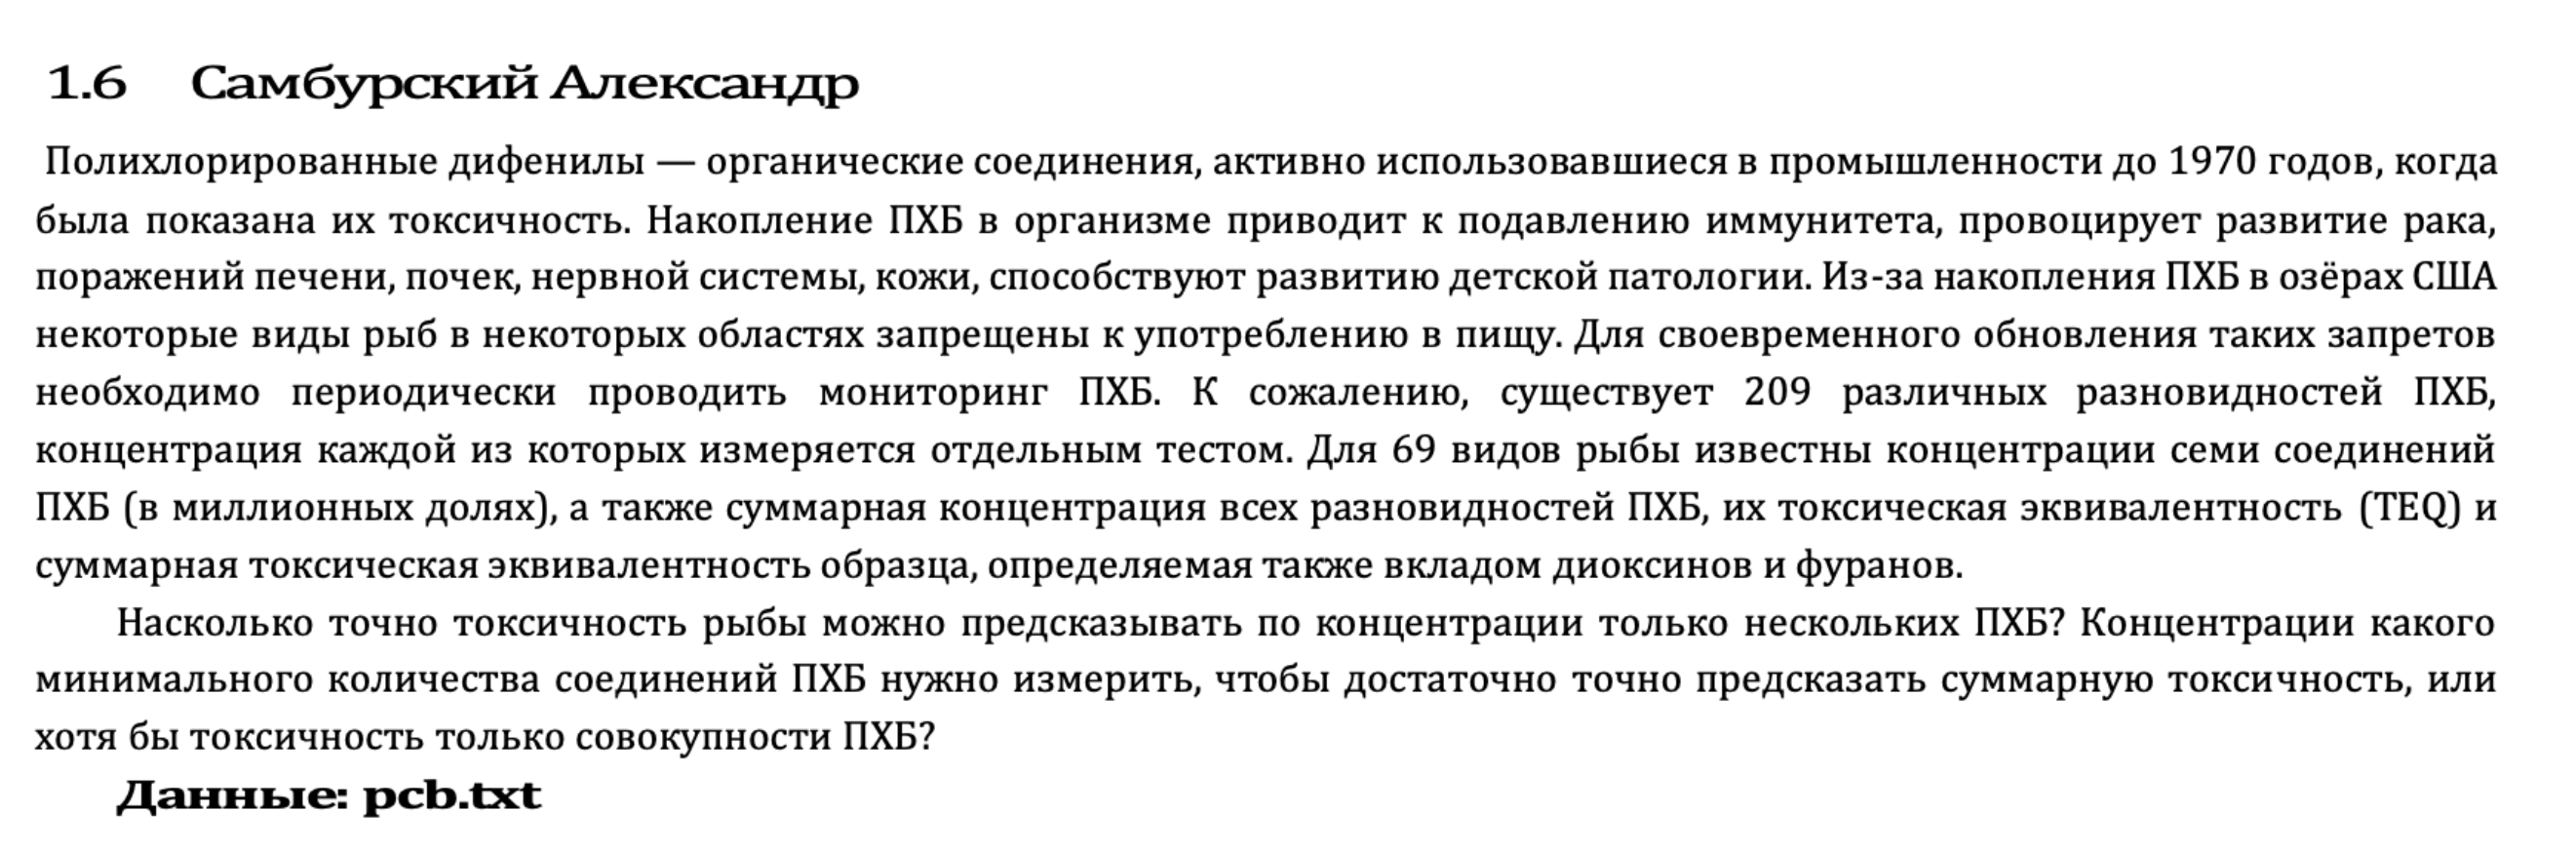

# Посмотрим на данные

In [4]:
data

specimen  pcb138  pcb153  pcb180  pcb28  pcb52  pcb126  pcb118       pcb  \
0          1    1.46    1.59   0.738  0.421  0.532  0.0000   0.720   19.9959   
1          2    0.64    0.92   0.664  0.025  0.030  0.0000   0.236    6.0996   
2          3    3.29    3.90   1.150  0.076  0.134  0.0000   1.540   24.9655   
3          4    3.94    5.44   1.330  0.152  0.466  0.0055   1.940   37.4436   
4          5    3.18    3.65   2.140  0.116  0.243  0.0059   1.470   30.1830   
..       ...     ...     ...     ...    ...    ...     ...     ...       ...   
64        65   18.10   32.50   9.870  0.576  2.750  0.0263   8.190  198.5225   
65        66   13.10    7.72   4.490  0.243  0.538  0.0317   6.860   89.3715   
66        67   25.20   35.20  13.000  1.980  1.420  0.0256  13.000  210.3284   
67        68   12.30   25.90   3.750  1.760  9.060  0.0166  18.900  246.6618   
68        69   32.30   43.50  31.500  0.915  1.800  0.0281   8.490  318.7461   

        teq   teqpcb  teqdioxin  teqfuran  
0   0.93840  0.18892    0.60948     0.140  
1   0.96881  0.06837    0.90044     0.000  
2   0.97992  0.32992    0.62000     0.030  
3   0.99850  0.92350    0.00500     0.070  
4   1.01654  0.92654    0.00000     0.090  
..      ...      ...        ...       ...  
64  5.81782  4.33239    1.05843     0.427  
65  5.94828  4.88513    0.64115     0.422  
66  6.26579  5.41694    0.71885     0.130  
67  6.29944  4.57774    0.76470     0.957  
68  6.49311  5.10758    1.18553     0.200  

[69 rows x 13 columns]

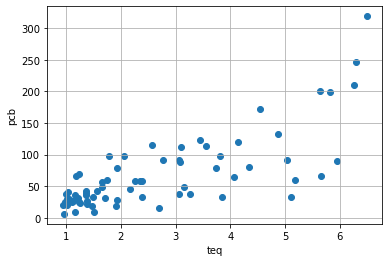

In [6]:
plt.scatter(data['teq'], data['pcb'])
plt.grid()
plt.xlabel('teq')
plt.ylabel('pcb');

Есть явная взаимосвязь между концентрацией ПХБ и токсической эквивалентностью.

In [435]:
pcb_list = list(data.columns)[1:8]
pcb_list

['pcb138', 'pcb153', 'pcb180', 'pcb28', 'pcb52', 'pcb126', 'pcb118']

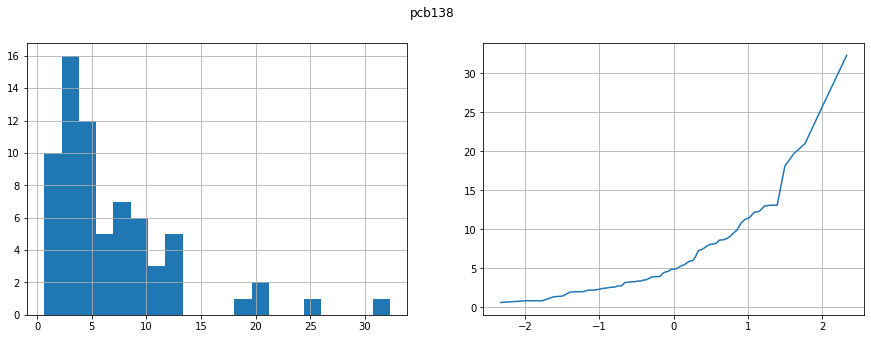

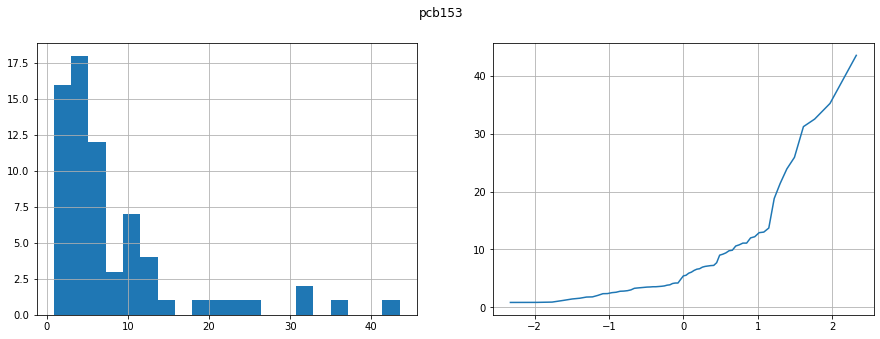

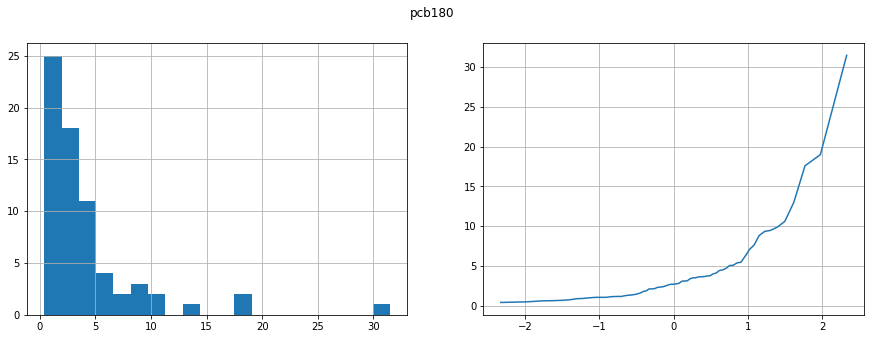

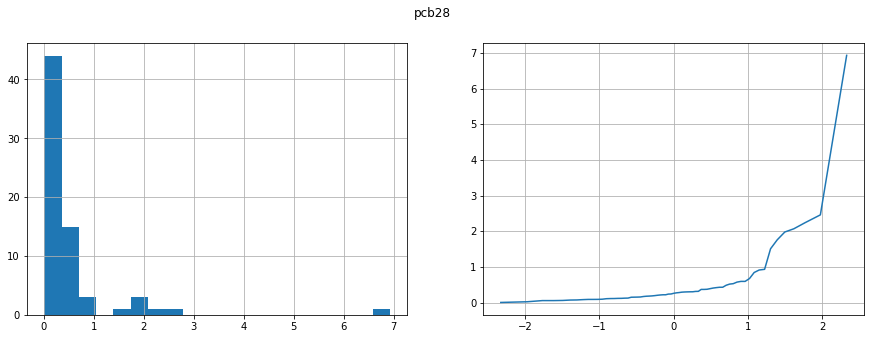

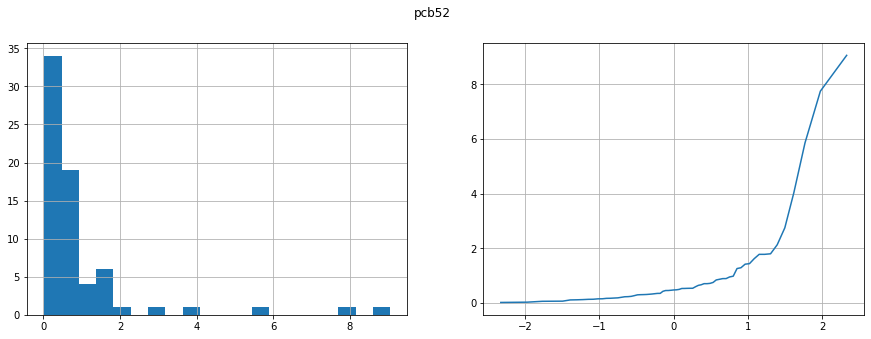

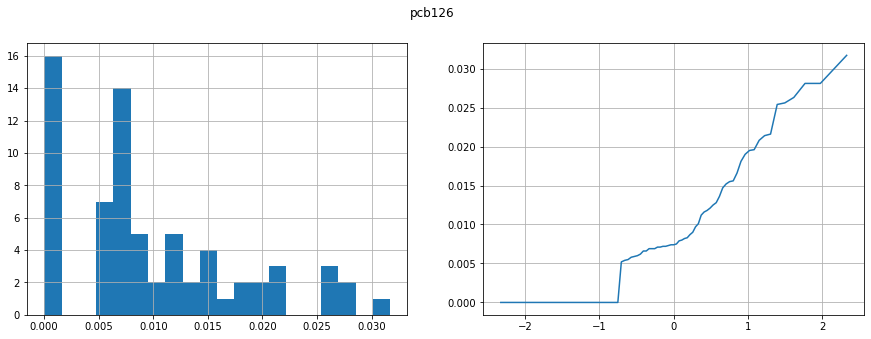

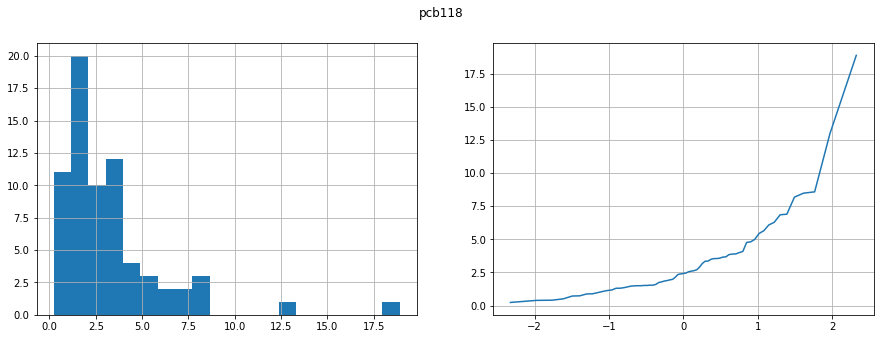

In [8]:
for pcb in pcb_list:
    fig, ax = plt.subplots(figsize=(15, 5), ncols=2)
    ax[0].hist(data[pcb], bins=20)
    ax[1].plot(*scipy.stats.probplot(np.array(data[pcb].T))[0])
    
    ax[0].grid()
    ax[1].grid()
    
    fig.suptitle(pcb)

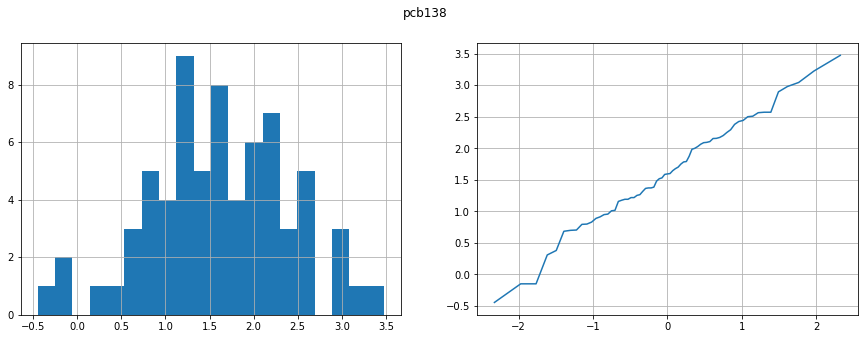

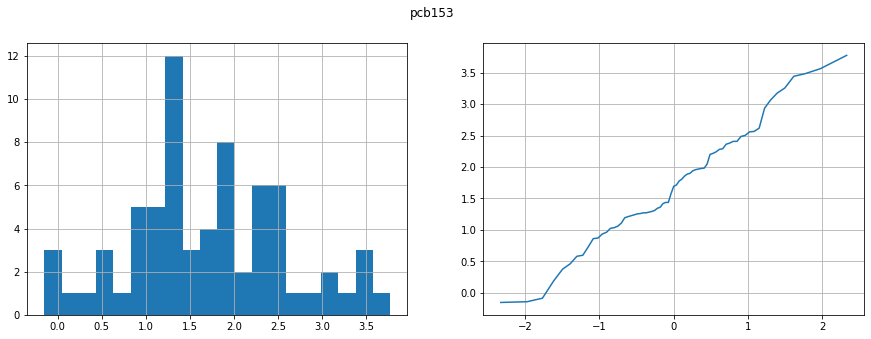

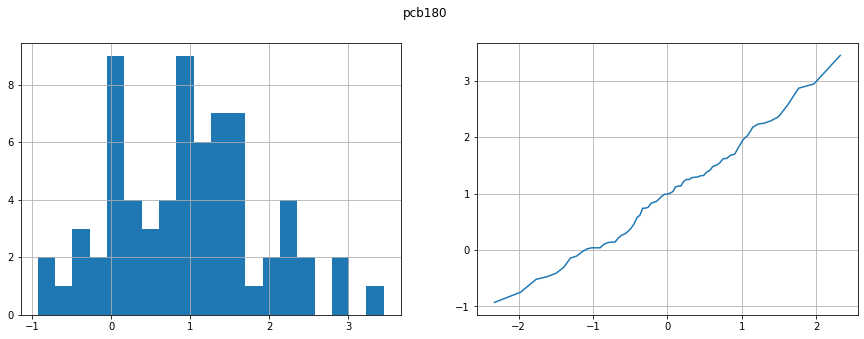

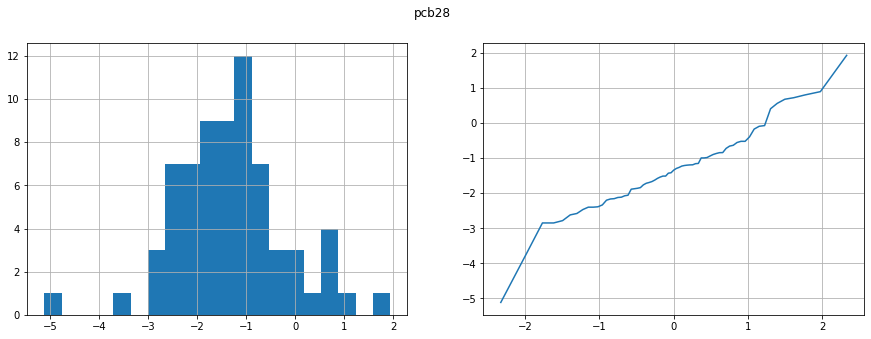

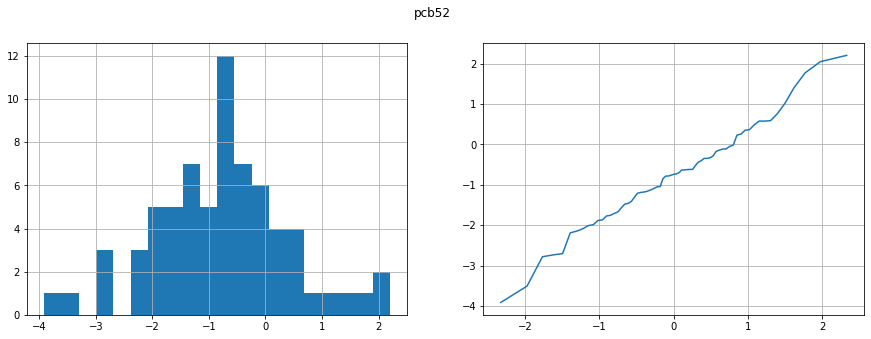

In [440]:
for pcb in pcb_list[:-2]:
    fig, ax = plt.subplots(figsize=(15, 5), ncols=2)
    ax[0].hist(np.log(data[pcb]), bins=20)
    ax[1].plot(*scipy.stats.probplot(np.array(np.log(data[pcb]).T))[0])
    
    ax[0].grid()
    ax[1].grid()
    
    fig.suptitle(pcb)

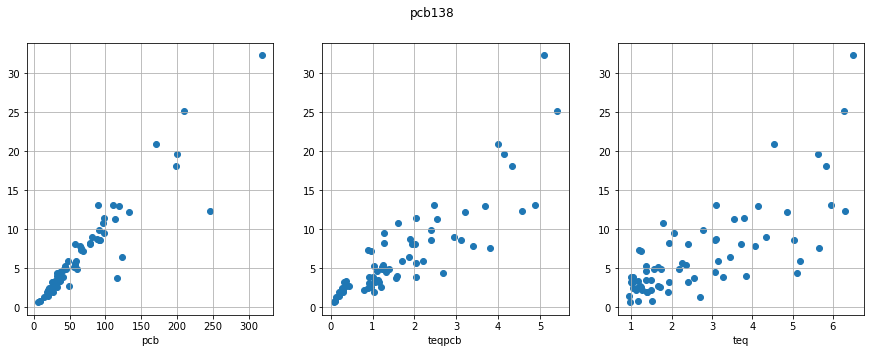

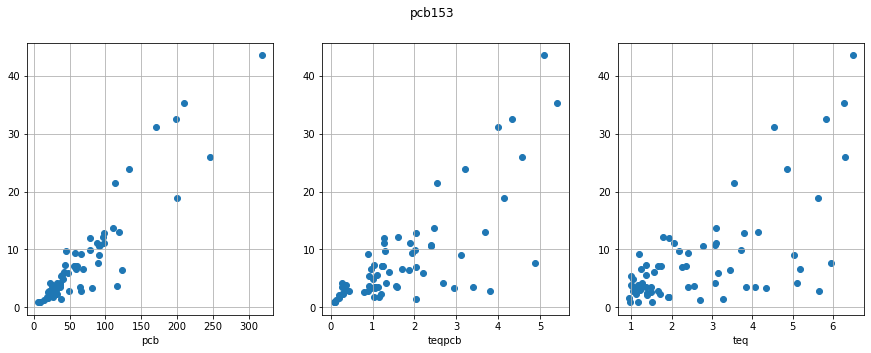

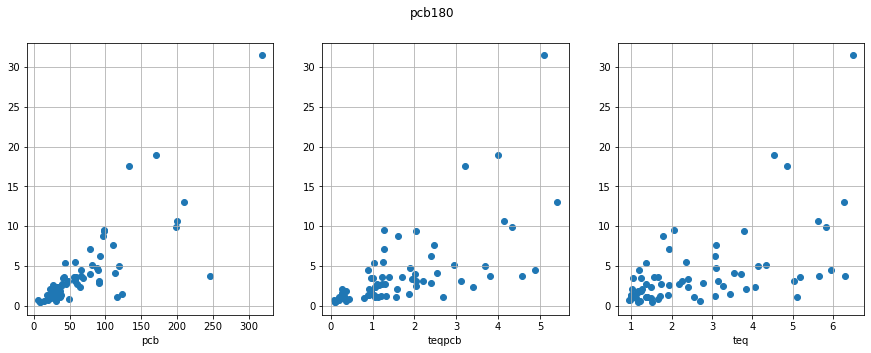

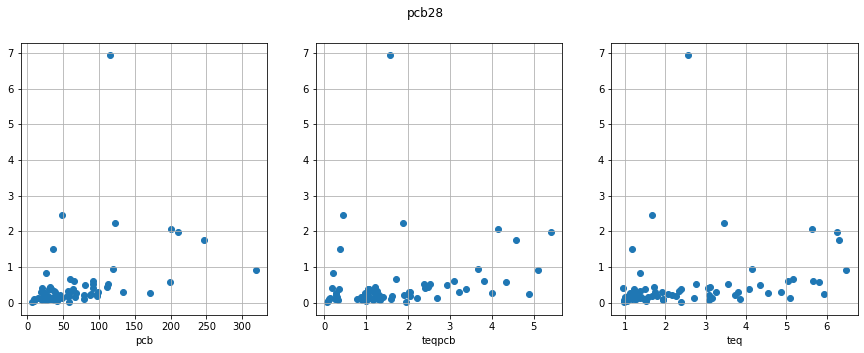

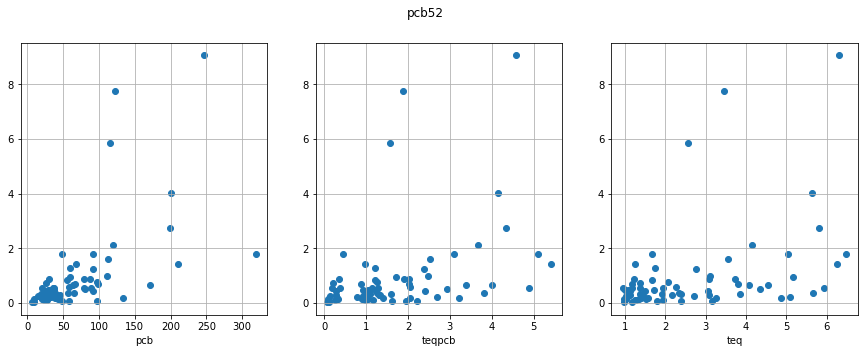

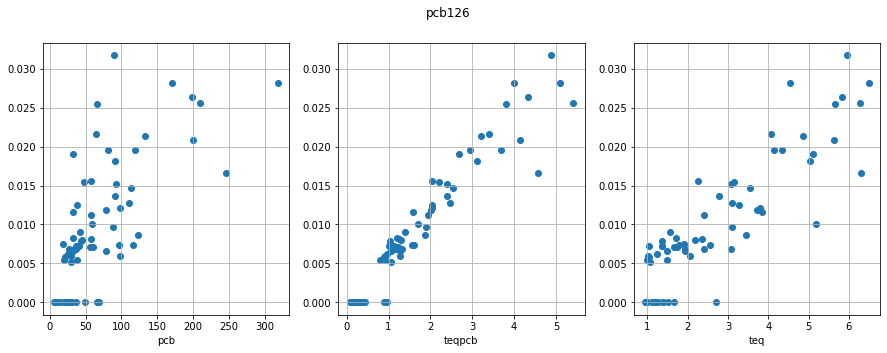

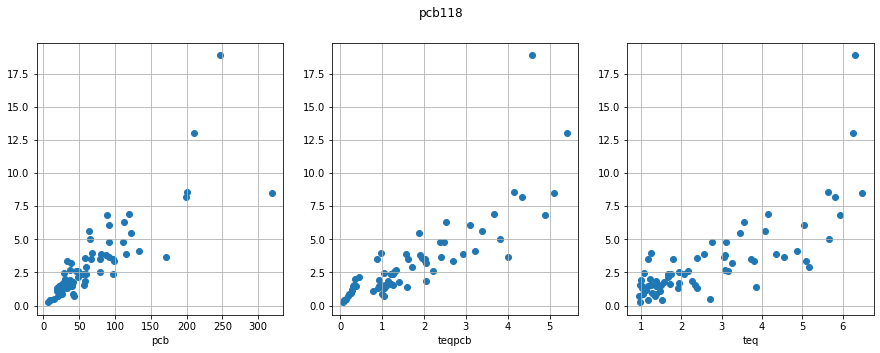

In [86]:
for pcb in pcb_list:
    fig, ax = plt.subplots(figsize=(15, 5), ncols=3)
    ax[0].scatter(data['pcb'], data[pcb])
    ax[1].scatter(data['teqpcb'], data[pcb])
    ax[2].scatter(data['teq'], data[pcb])
    
    ax[0].set_xlabel('pcb')
    ax[1].set_xlabel('teqpcb')
    ax[2].set_xlabel('teq')
    
    ax[0].grid()
    ax[1].grid()
    ax[2].grid()
    
    
    fig.suptitle(pcb)

Прослеживается линейная зависимость между ПХБ и целевыми переменными.

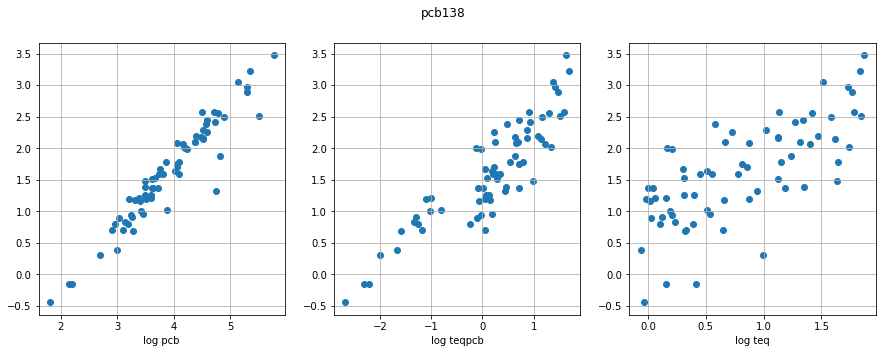

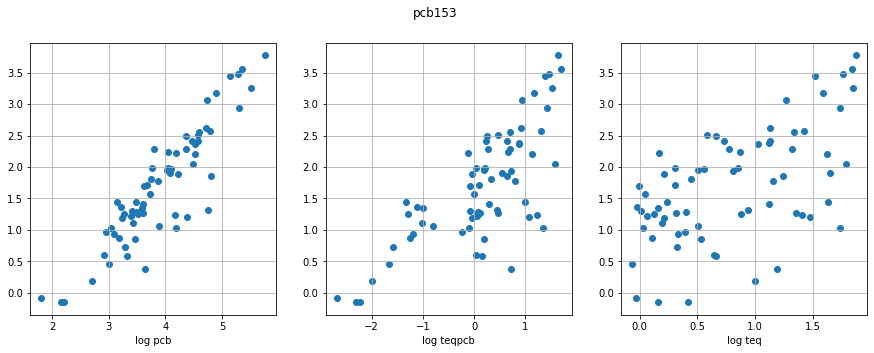

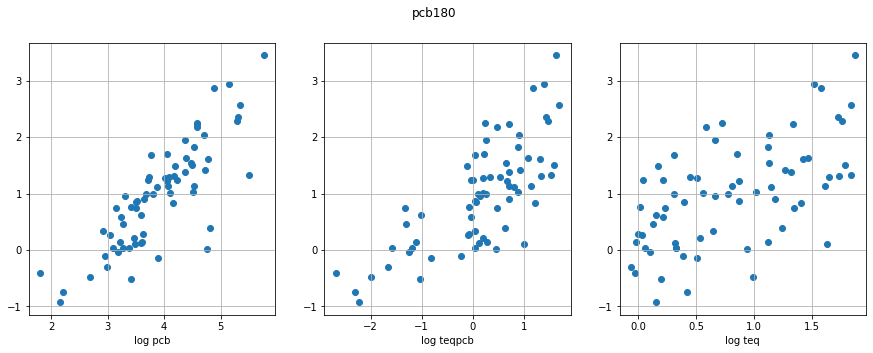

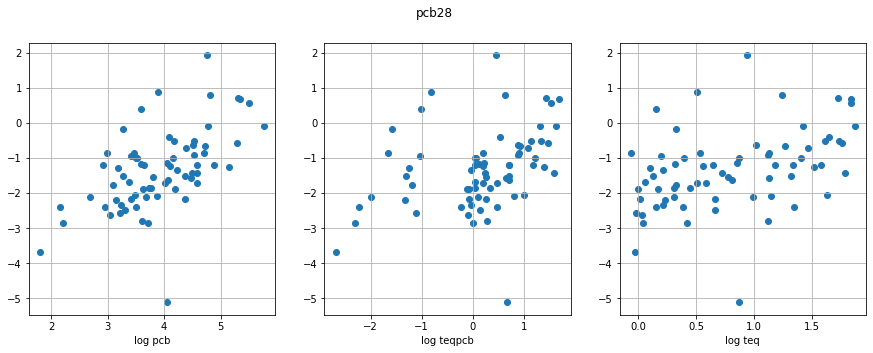

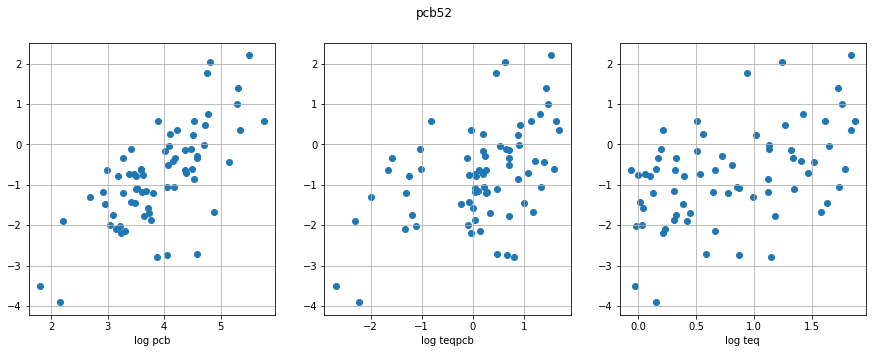

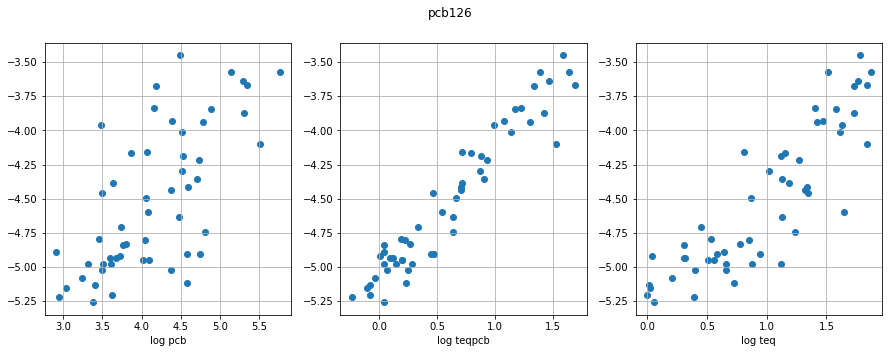

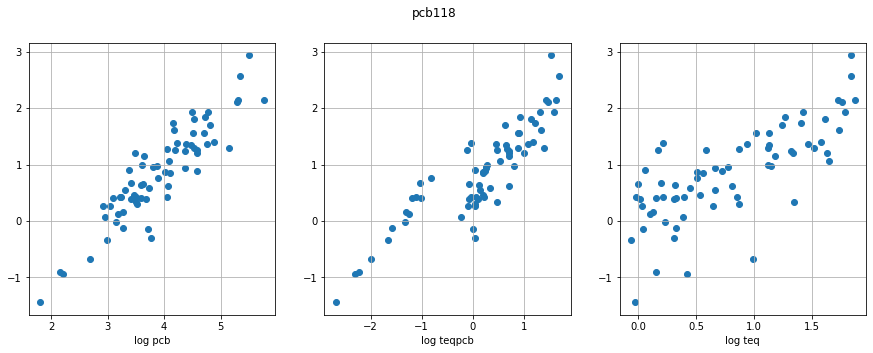

In [334]:
for pcb in pcb_list:
    fig, ax = plt.subplots(figsize=(15, 5), ncols=3)
    ax[0].scatter(np.log(data['pcb']), np.log(data[pcb]))
    ax[1].scatter(np.log(data['teqpcb']), np.log(data[pcb]))
    ax[2].scatter(np.log(data['teq']), np.log(data[pcb]))
    
    ax[0].set_xlabel('log pcb')
    ax[1].set_xlabel('log teqpcb')
    ax[2].set_xlabel('log teq')
    
    ax[0].grid()
    ax[1].grid()
    ax[2].grid()
    
    fig.suptitle(pcb)

Логарифмированием переменных и откликов можно получить более "плавное" своместное распределение - при логарифмировании будут получаться более качественные оценки.

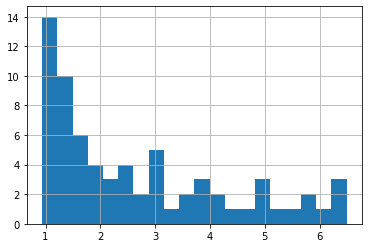

In [441]:
data['teq'].hist(bins=20)

In [442]:
print ('Box-Cox transformation: lambda=%f' % stats.boxcox(data['teq'])[1])

Box-Cox transformation: lambda=-0.288254


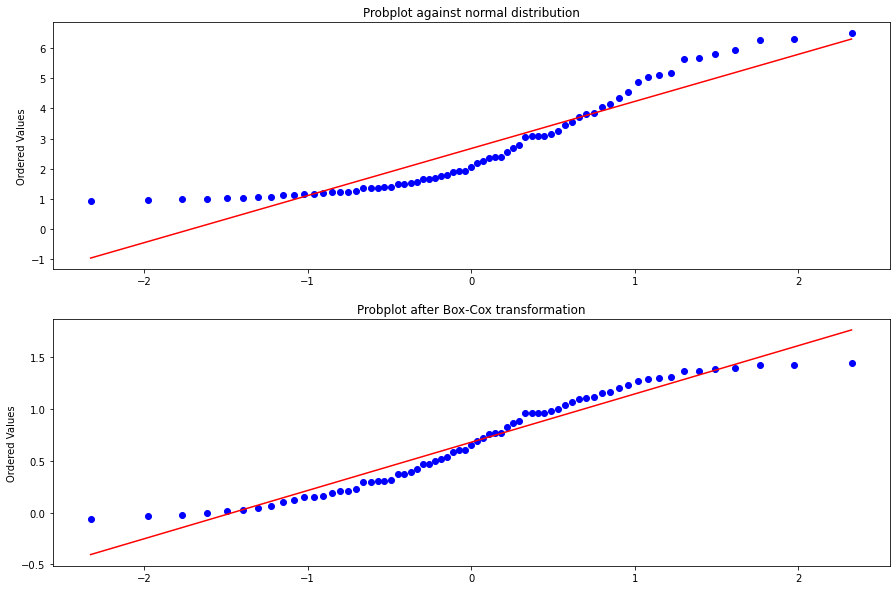

In [443]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)
x = data['teq']
stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(x)
stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
ax2.set_xlabel('');

Аналогично прошлым выводам, логарифмирование целевой переменной поможет облегчить работу модели МНК, сделав отклик нормально распределенным.

# Построим модель для прогнозирования токсической эквивалентности

Сначала включим все признаки в рассмотрение и посмотрим на показатели

In [408]:
m0 = smf.ols('np.log(teq) ~ pcb138 + pcb153 + pcb180 + pcb28 + pcb52 + pcb126 + pcb118', data=data)
result_m0 = m0.fit()
result_m0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(teq)   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     32.42
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           2.78e-18
Time:                        01:03:45   Log-Likelihood:                -8.2254
No. Observations:                  69   AIC:                             32.45
Df Residuals:                      61   BIC:                             50.32
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1439      0.059      2.455      0.017       0.027       0.261
pcb138        -0.0017      0.026     -0.064      0.949      -0.053       0.050
pcb153        -0.0115      0.013     -0.856      0.396      -0.038       0.015
pcb180         0.0136      0.022      0.611      0.543      -0.031       0.058
pcb28          0.0172      0.054      0.319      0.750      -0.091       0.125
pcb52          0.0444      0.045      0.975      0.333      -0.047       0.135
pcb126        54.4557      7.529      7.232      0.000      39.400      69.512
pcb118         0.0399      0.033      1.205      0.233      -0.026       0.106
==============================================================================
Omnibus:                        7.750   Durbin-Watson:                   1.141
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.337
Skew:                           0.630   Prob(JB):                       0.0255
Kurtosis:                       3.981   Cond. No.                     3.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Как видно, остатки распределены нормально:

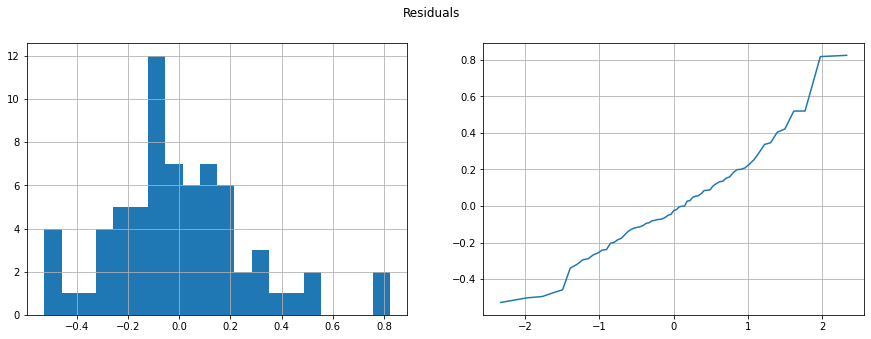

In [444]:
fig, ax = plt.subplots(figsize=(15, 5), ncols=2)

ax[0].hist(result_m0.resid, bins=20);
ax[1].plot(*scipy.stats.probplot(result_m0.resid)[0])

fig.suptitle('Residuals')
ax[0].grid()
ax[1].grid()

В данных отсутствует явная гетероскедастичность:

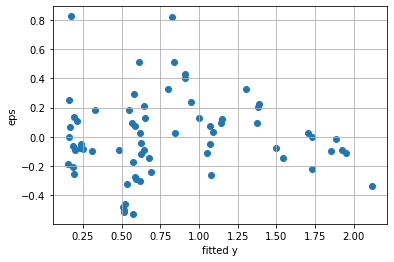

In [410]:
plt.scatter(result_m1.fittedvalues, result_m1.resid)
plt.grid()
plt.xlabel('fitted y')
plt.ylabel('eps');

Посмотрим на распределение общий вид качества прогноза

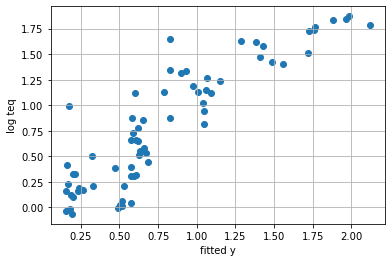

In [411]:
plt.scatter(result_m0.predict(), np.log(data['teq']))
plt.xlabel('fitted y')
plt.ylabel('log teq');
plt.grid()

Используя статистические критерии, проанализируем остатки на предмет гетероскедастичности, нормальности и несмещенности:

In [412]:
print ('Breusch-Pagan test: p=%f' % sms.het_breuschpagan(result_m0.resid, result_m0.model.exog)[1])
print ('Shapiro-Wilk test: p=%f' % stats.shapiro(result_m0.resid)[1])
print ('Wilcoxon test: p=%f' % stats.wilcoxon(result_m0.resid)[1])

Breusch-Pagan test: p=0.758581
Shapiro-Wilk test: p=0.046799
Wilcoxon test: p=0.656008


Получили, что остатки распределены нормально, несмещённо, гомоскедастично.

In [446]:
scipy.stats.ttest_1samp(result_m0.resid, 0)[1]

0.9999999999999512

# Изменим набор признаков, на которых строится модель

In [414]:
corr = np.corrcoef(data[pcb_list].T)
corr = np.abs(corr)
corr = corr

pd.DataFrame(corr,
             columns = pcb_list,
             index = pcb_list
            ).style.background_gradient(cmap='Reds', axis=None)

Наблюдается высокая корреляция между первыми тремя типами ПХБ. Выше видно, что данные признаки имеют большое p-значение при проверке их ценности для модели. Попробуем оставить только один из них.

Кроме того опционально сделаем StandardScaler-процедуру для признаков, чтобы сравнить величины их коэффициентов.

In [447]:
for pcb in pcb_list:
    data['sc_'+pcb] = StandardScaler().fit_transform(np.array(data[pcb]).reshape(-1, 1))
    data['log_'+pcb] = np.log(data[pcb]+1e-8)
sc_pcb_list = ['sc_'+x for x in pcb_list]

In [416]:
m1 = smf.ols('np.log(teq) ~ pcb153 + sc_pcb28 + sc_pcb52 + sc_pcb126 + sc_pcb118', data=data)
result_m1 = m1.fit()
result_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(teq)   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     46.39
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           7.59e-20
Time:                        01:03:52   Log-Likelihood:                -8.5103
No. Observations:                  69   AIC:                             29.02
Df Residuals:                      63   BIC:                             42.43
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8386      0.062     13.466      0.000       0.714       0.963
pcb153        -0.0041      0.006     -0.653      0.516      -0.017       0.008
sc_pcb28       0.0197      0.049      0.402      0.689      -0.078       0.118
sc_pcb52       0.0673      0.069      0.974      0.334      -0.071       0.205
sc_pcb126      0.4581      0.053      8.642      0.000       0.352       0.564
sc_pcb118      0.0892      0.079      1.135      0.261      -0.068       0.246
==============================================================================
Omnibus:                        7.152   Durbin-Watson:                   1.157
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                6.626
Skew:                           0.596   Prob(JB):                       0.0364
Kurtosis:                       3.940   Cond. No.                         36.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Значимость признака')

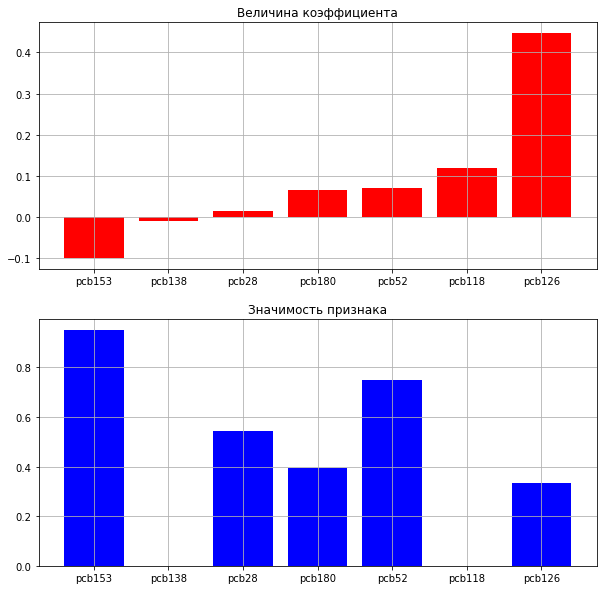

In [418]:
m0_ = smf.ols('np.log(teq) ~ sc_pcb138 + sc_pcb153 + sc_pcb180 + sc_pcb28 + sc_pcb52 + sc_pcb126 + sc_pcb118', data=data)
result_m0_ = m0_.fit()

results_as_html = result_m0_.summary().tables[1].as_html()
pvals = pd.read_html(results_as_html, header=0, index_col=0)[0].iloc[:, 3]

sorted_pcb_coef_inds = list(np.argpartition(result_m0_.params[1:], kth=np.arange(len(result_m0_.params[1:]))))
fig, ax = plt.subplots(figsize=(10, 10), nrows=2)
ax[0].bar(np.array(pcb_list)[sorted_pcb_coef_inds], result_m0_.params[1:][sorted_pcb_coef_inds], color='red')
ax[1].bar(np.array(pcb_list)[sorted_pcb_coef_inds], pvals[sorted_pcb_coef_inds], color='blue')

ax[0].grid()
ax[1].grid()

ax[0].set_title('Величина коэффициента')
ax[1].set_title('Значимость признака')

Посмотрим на зависимость остатков от признаков

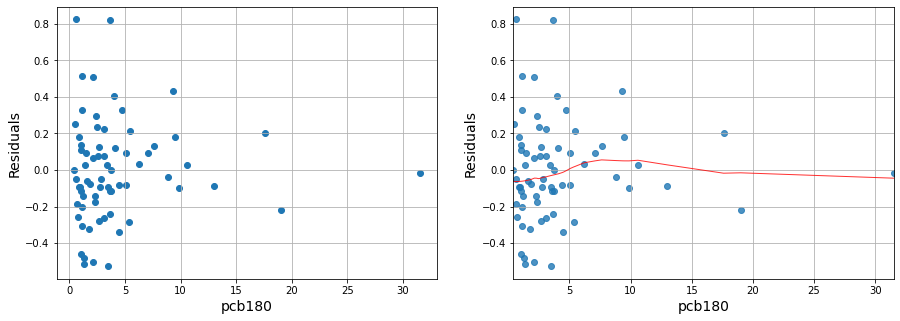

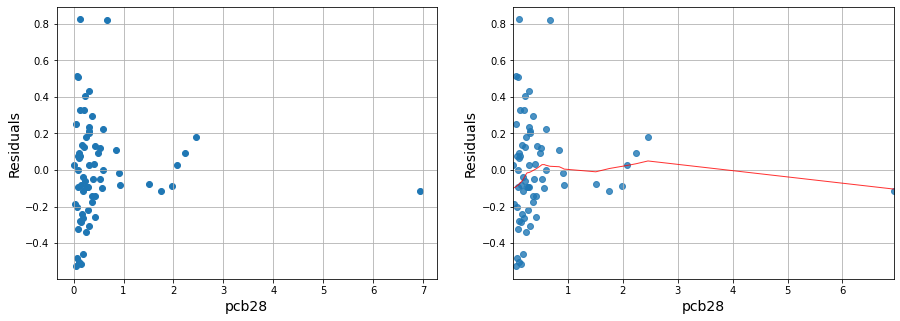

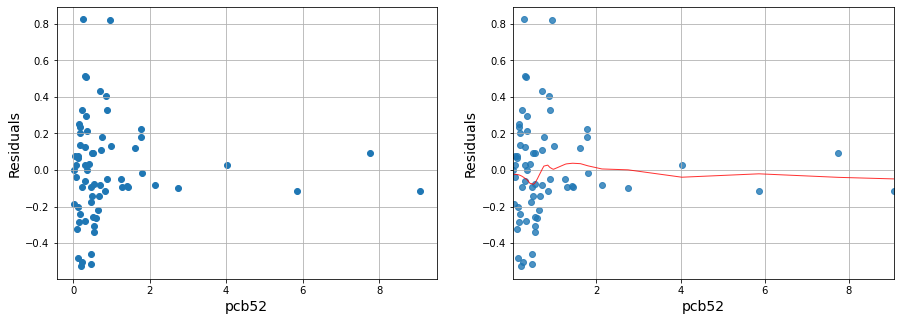

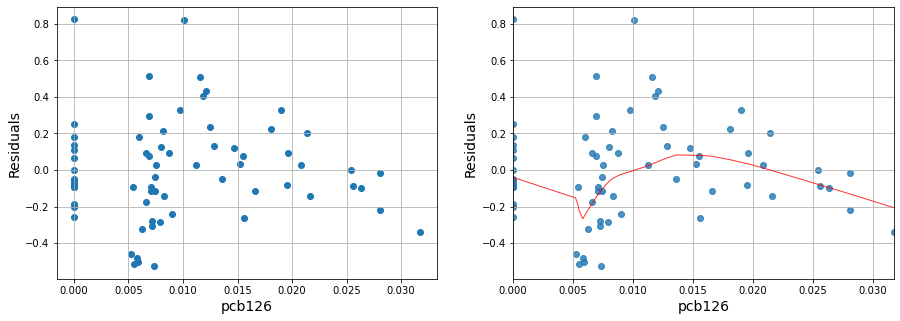

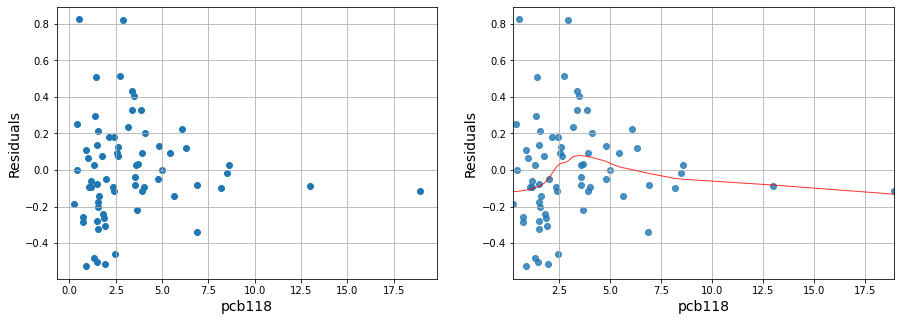

In [419]:
for pcb in pcb_list[2:]:
    fig, ax = plt.subplots(figsize=(15, 5), ncols=2)
    ax[0].scatter(data[pcb], result_m1.resid)
    ax[0].grid()
    ax[0].set_xlabel(pcb, fontsize=14)
    ax[0].set_ylabel('Residuals', fontsize=14)
    
    sns.regplot(data[pcb],result_m1.resid, scatter=True,
                  lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    ax[1].set_xlabel(pcb, fontsize=14)
    ax[1].set_ylabel('Residuals', fontsize=14)
    ax[1].grid()

В целом, наблюдается квадратичная зависимость остатков для признака pcb126. Добавим квадрат этого признака

In [430]:
m2_ = smf.ols('np.log(teq) ~ sc_pcb153 + sc_pcb28 + sc_pcb52 + sc_pcb126 + np.power(sc_pcb126, 2) + sc_pcb118', data=data)
result_m2_ = m2_.fit()
result_m2_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(teq)   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     39.40
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           2.36e-19
Time:                        01:07:18   Log-Likelihood:                -7.5592
No. Observations:                  69   AIC:                             29.12
Df Residuals:                      62   BIC:                             44.76
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.8461      0.047     18.189      0.000       0.753       0.939
sc_pcb153                 -0.0230      0.054     -0.422      0.675      -0.132       0.086
sc_pcb28                   0.0292      0.049      0.593      0.555      -0.069       0.128
sc_pcb52                   0.0469      0.070      0.666      0.508      -0.094       0.188
sc_pcb126                  0.4783      0.055      8.713      0.000       0.369       0.588
np.power(sc_pcb126, 2)    -0.0414      0.031     -1.316      0.193      -0.104       0.021
sc_pcb118                  0.0997      0.079      1.269      0.209      -0.057       0.257
==============================================================================
Omnibus:                        7.628   Durbin-Watson:                   1.326
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.967
Skew:                           0.541   Prob(JB):                       0.0186
Kurtosis:                       4.265   Cond. No.                         6.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

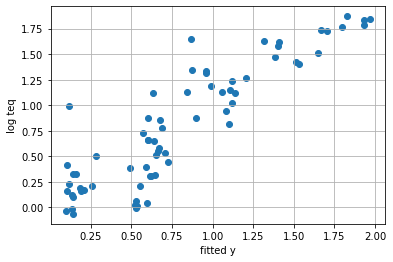

In [431]:
plt.scatter(result_m2_.predict(), np.log(data['teq']))
plt.xlabel('fitted y')
plt.ylabel('log teq');
plt.grid()

Сменим набор признаков на "логарифмический" - посмотрим, будет ли улучшение, как мы предполагали

In [450]:
m2 = smf.ols('np.log(teq) ~ log_pcb153 + log_pcb28 + log_pcb52 + log_pcb126 + np.power(log_pcb126, 2) + log_pcb118', data=data)
result_m2 = m2.fit()
result_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(teq)   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     49.69
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           7.55e-22
Time:                        01:28:35   Log-Likelihood:                -1.0691
No. Observations:                  69   AIC:                             16.14
Df Residuals:                      62   BIC:                             31.78
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   5.9211      0.612      9.668      0.000       4.697       7.145
log_pcb153                 -0.0778      0.058     -1.335      0.187      -0.194       0.039
log_pcb28                   0.0054      0.048      0.112      0.911      -0.091       0.102
log_pcb52                   0.0705      0.053      1.322      0.191      -0.036       0.177
log_pcb126                  1.3335      0.150      8.904      0.000       1.034       1.633
np.power(log_pcb126, 2)     0.0561      0.006      8.745      0.000       0.043       0.069
log_pcb118                  0.1073      0.086      1.241      0.219      -0.066       0.280
==============================================================================
Omnibus:                        9.364   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.047
Skew:                           0.766   Prob(JB):                       0.0109
Kurtosis:                       3.893   Cond. No.                     3.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [451]:
print ('m2 + fitted(m1):  t-value=%f,  Pr(>|t|)=%f' % sms.compare_j(result_m2_, result_m2))
print ('m1 + fitted(m2):  t-value=%f,  Pr(>|t|)=%f' % sms.compare_j(result_m2, result_m2_))

m2 + fitted(m1):  t-value=0.103203,  Pr(>|t|)=0.918140
m1 + fitted(m2):  t-value=4.068152,  Pr(>|t|)=0.000138


По критерию Давидсона-Маккинона видно, что модель значительно улучшилась. То же видно и по значениям AIC, BIC, R^2 и др.

In [311]:
m2 = smf.ols('teq ~ log_pcb153 + log_pcb28 + log_pcb52 + log_pcb126 + np.power(log_pcb126, 2) + log_pcb118', data=data)
result_m2 = m2.fit()
result_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    teq   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     60.61
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           4.51e-24
Time:                        00:25:56   Log-Likelihood:                -64.844
No. Observations:                  69   AIC:                             143.7
Df Residuals:                      62   BIC:                             159.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  17.5510      1.543     11.372      0.000      14.466      20.636
log_pcb153                 -0.1527      0.147     -1.041      0.302      -0.446       0.141
log_pcb28                   0.0163      0.122      0.134      0.894      -0.228       0.261
log_pcb52                   0.1801      0.135      1.339      0.185      -0.089       0.449
log_pcb126                  3.9506      0.377     10.468      0.000       3.196       4.705
np.power(log_pcb126, 2)     0.1677      0.016     10.371      0.000       0.135       0.200
log_pcb118                  0.2983      0.218      1.370      0.176      -0.137       0.734
==============================================================================
Omnibus:                       12.215   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.823
Skew:                           0.771   Prob(JB):                     0.000604
Kurtosis:                       4.666   Cond. No.                     3.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

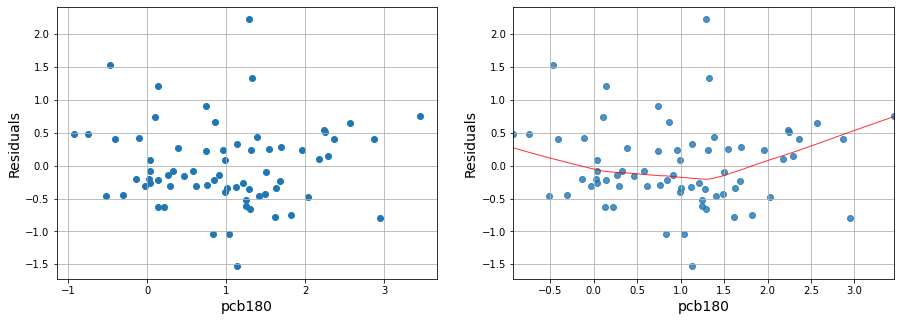

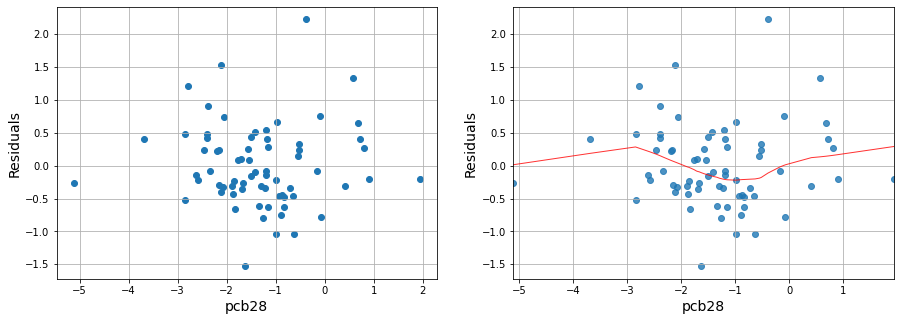

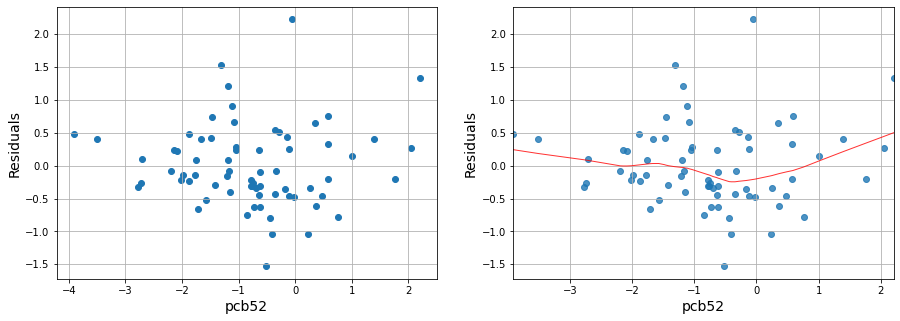

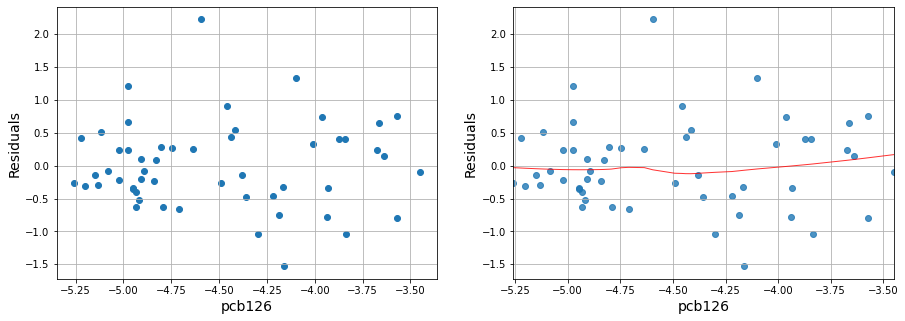

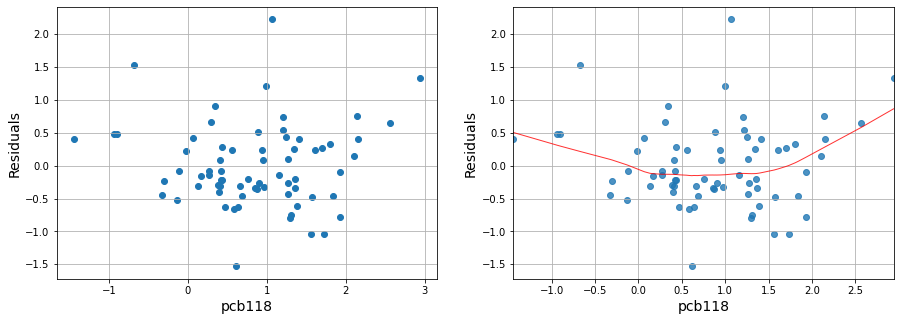

In [312]:
for pcb in pcb_list[2:]:
    fig, ax = plt.subplots(figsize=(15, 5), ncols=2)
    ax[0].scatter(np.log(data[pcb]), result_m2.resid)
    ax[0].grid()
    ax[0].set_xlabel(pcb, fontsize=14)
    ax[0].set_ylabel('Residuals', fontsize=14)
    
    sns.regplot(np.log(data[pcb]),result_m2.resid, scatter=True,
                  lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    ax[1].set_xlabel(pcb, fontsize=14)
    ax[1].set_ylabel('Residuals', fontsize=14)
    ax[1].grid()

In [314]:
m2 = smf.ols('np.log(teq) ~ log_pcb153 + log_pcb28 + log_pcb52 + log_pcb126 + log_pcb118 + np.power(log_pcb126, 2) + np.power(log_pcb118, 2)', data=data)
result_m2 = m2.fit()
result_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(teq)   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     43.22
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           2.59e-21
Time:                        00:26:44   Log-Likelihood:               -0.18457
No. Observations:                  69   AIC:                             16.37
Df Residuals:                      61   BIC:                             34.24
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   5.5820      0.666      8.375      0.000       4.249       6.915
log_pcb153                 -0.0794      0.058     -1.370      0.176      -0.195       0.037
log_pcb28                   0.0091      0.048      0.189      0.851      -0.088       0.106
log_pcb52                   0.0605      0.054      1.125      0.265      -0.047       0.168
log_pcb126                  1.2454      0.165      7.562      0.000       0.916       1.575
log_pcb118                  0.0614      0.093      0.657      0.514      -0.125       0.248
np.power(log_pcb126, 2)     0.0522      0.007      7.372      0.000       0.038       0.066
np.power(log_pcb118, 2)     0.0441      0.035      1.259      0.213      -0.026       0.114
==============================================================================
Omnibus:                       10.609   Durbin-Watson:                   1.379
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.666
Skew:                           0.826   Prob(JB):                      0.00483
Kurtosis:                       3.991   Cond. No.                     3.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Определим по расстоянию Кука потенциальные "выбросы" (Не в привычном смысле этого слова!), утяжеляющие работу регрессии.

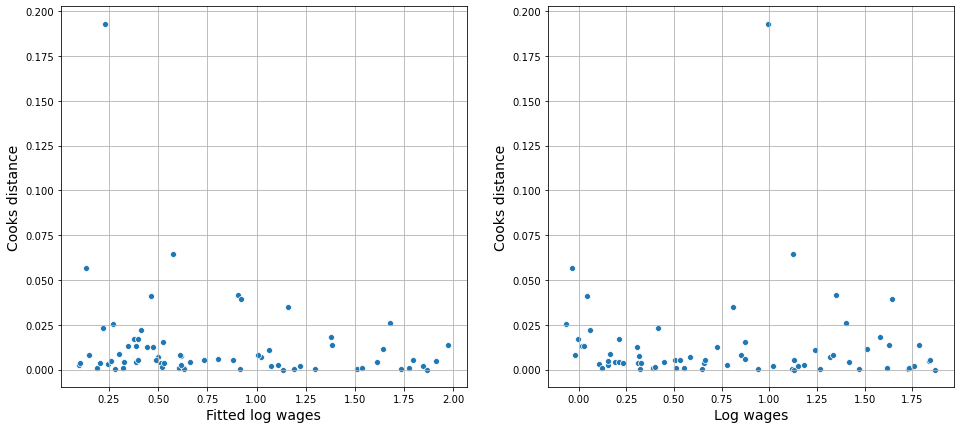

In [315]:
infl = result_m2.get_influence()
sm_fr = infl.summary_frame()

plt.figure(figsize=(16,7))
plt.subplot(121)
sns.scatterplot(result_m2.fittedvalues,sm_fr.cooks_d)
plt.xlabel('Fitted log wages', fontsize=14)
plt.ylabel('Cooks distance', fontsize=14)
plt.grid()

plt.subplot(122)
sns.scatterplot(np.log(data['teq']),sm_fr.cooks_d)
plt.xlabel('Log wages', fontsize=14)
plt.ylabel('Cooks distance', fontsize=14)
plt.grid()

In [316]:
data_cook = data[sm_fr.cooks_d <= 0.05]

In [328]:
m3 = smf.ols('np.log(teq) ~ log_pcb153 + log_pcb28 + log_pcb52 + log_pcb126 + log_pcb118 + np.power(log_pcb126, 2) + np.power(log_pcb118, 2)', data=data_cook)
result_m3 = m3.fit()
result_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(teq)   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     55.06
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           2.71e-23
Time:                        00:30:43   Log-Likelihood:                 7.7383
No. Observations:                  66   AIC:                            0.5235
Df Residuals:                      58   BIC:                             18.04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   5.4482      0.602      9.045      0.000       4.242       6.654
log_pcb153                 -0.0486      0.052     -0.931      0.356      -0.153       0.056
log_pcb28                   0.0493      0.044      1.108      0.272      -0.040       0.138
log_pcb52                   0.0215      0.049      0.442      0.660      -0.076       0.119
log_pcb126                  1.2234      0.148      8.242      0.000       0.926       1.520
log_pcb118                  0.0834      0.097      0.858      0.395      -0.111       0.278
np.power(log_pcb126, 2)     0.0512      0.006      8.021      0.000       0.038       0.064
np.power(log_pcb118, 2)     0.0357      0.037      0.958      0.342      -0.039       0.110
==============================================================================
Omnibus:                        6.467   Durbin-Watson:                   1.312
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                5.611
Skew:                           0.654   Prob(JB):                       0.0605
Kurtosis:                       3.575   Cond. No.                     3.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

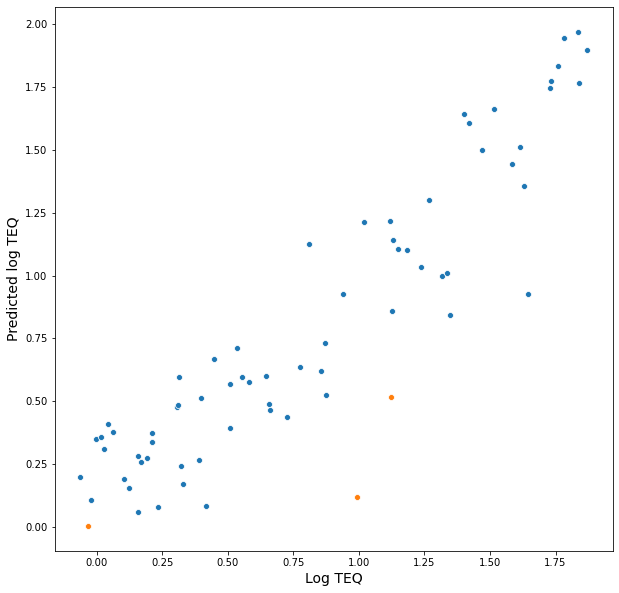

In [329]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(np.log(data['teq']),result_m3.fittedvalues)
sns.scatterplot(np.log(data[sm_fr.cooks_d > 0.05]['teq']),result_m3.predict(data[sm_fr.cooks_d > 0.05]))
plt.xlabel('Log TEQ', fontsize=14)
plt.ylabel('Predicted log TEQ', fontsize=14)
plt.show()

Оставим значимые признаки (по p-value):

In [330]:
m3 = smf.ols('np.log(teq) ~ log_pcb28 + log_pcb126 + np.power(log_pcb126, 2) + np.power(log_pcb118, 2)', data=data_cook)
result_m3 = m3.fit()
result_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(teq)   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     98.52
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           6.60e-26
Time:                        00:31:17   Log-Likelihood:                 6.9305
No. Observations:                  66   AIC:                            -3.861
Df Residuals:                      61   BIC:                             7.087
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   5.4030      0.519     10.412      0.000       4.365       6.441
log_pcb28                   0.0728      0.030      2.443      0.017       0.013       0.132
log_pcb126                  1.2154      0.134      9.057      0.000       0.947       1.484
np.power(log_pcb126, 2)     0.0509      0.006      8.759      0.000       0.039       0.062
np.power(log_pcb118, 2)     0.0534      0.027      2.008      0.049       0.000       0.107
==============================================================================
Omnibus:                        5.966   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                5.088
Skew:                           0.627   Prob(JB):                       0.0786
Kurtosis:                       3.527   Cond. No.                     3.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Аналогично предыдущему исследованию посмотрим на нормальность, несмещенность, гомоскедастичность остатков полученной модели.

In [331]:
print ('Breusch-Pagan test: p=%f' % sms.het_breuschpagan(result_m3.resid, result_m3.model.exog)[1])
print ('Shapiro-Wilk test: p=%f' % stats.shapiro(result_m3.resid)[1])
print ('Wilcoxon test: p=%f' % stats.wilcoxon(result_m3.resid)[1])

Breusch-Pagan test: p=0.172834
Shapiro-Wilk test: p=0.114682
Wilcoxon test: p=0.722935


In [332]:
scipy.stats.ttest_1samp(result_m3.resid, 0)[1]

0.9999999999985663

Модель объясняет 87% вариаций логарифма откликов. Визуализируем согласованность истинных значений с прогнозами логарифма токсической эквивалентности.

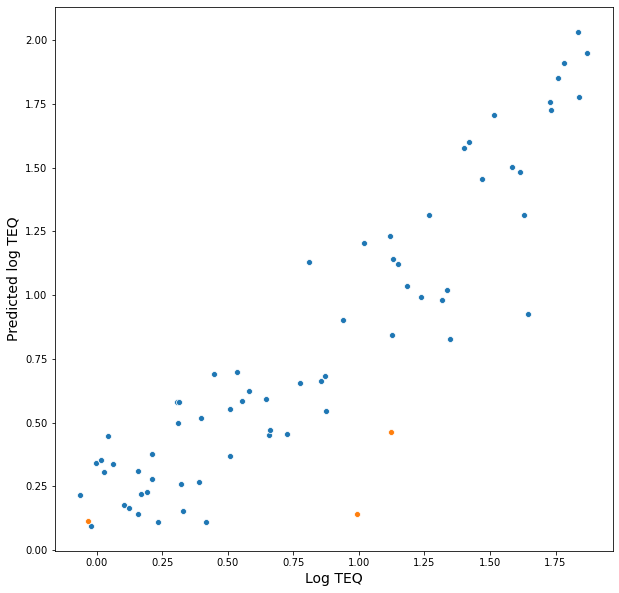

In [333]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(np.log(data['teq']),result_m3.fittedvalues)
sns.scatterplot(np.log(data[sm_fr.cooks_d > 0.05]['teq']),result_m3.predict(data[sm_fr.cooks_d > 0.05]))
plt.xlabel('Log TEQ', fontsize=14)
plt.ylabel('Predicted log TEQ', fontsize=14)
plt.show()

# Проделаем аналогичные действия для построения модели прогнозирования токсической эквивалентности ПХБ

In [452]:
n1 = smf.ols('np.log(teqpcb) ~ log_pcb153 + log_pcb28 + log_pcb126 + np.power(log_pcb126, 2) + np.power(log_pcb118, 2)', data=data)
result_n1 = n1.fit()
result_n1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(teqpcb)   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     156.5
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           3.73e-34
Time:                        01:37:33   Log-Likelihood:                -9.0110
No. Observations:                  69   AIC:                             30.02
Df Residuals:                      63   BIC:                             43.43
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   3.9450      0.672      5.869      0.000       2.602       5.288
log_pcb153                  0.2775      0.056      4.995      0.000       0.166       0.388
log_pcb28                   0.0988      0.035      2.809      0.007       0.028       0.169
log_pcb126                  1.0107      0.170      5.936      0.000       0.670       1.351
np.power(log_pcb126, 2)     0.0389      0.007      5.295      0.000       0.024       0.054
np.power(log_pcb118, 2)     0.0043      0.035      0.125      0.901      -0.065       0.073
==============================================================================
Omnibus:                       17.433   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.607
Skew:                           0.717   Prob(JB):                     9.23e-10
Kurtosis:                       6.524   Cond. No.                     3.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

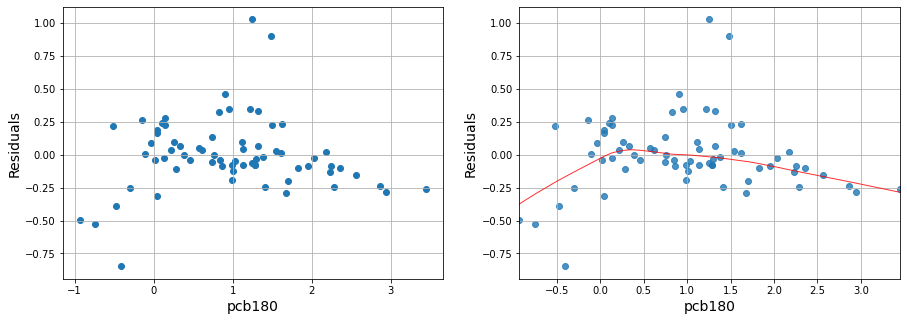

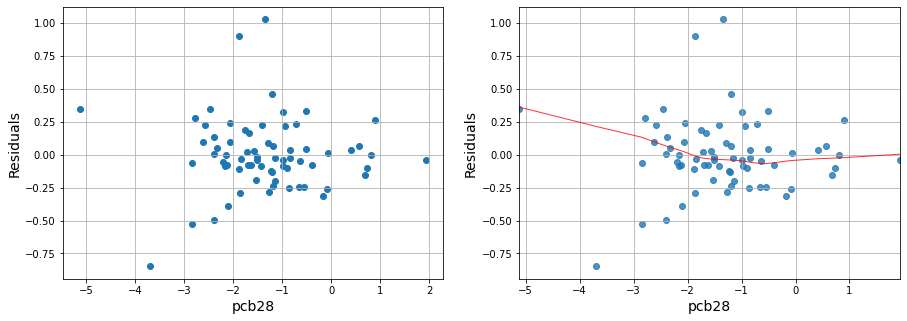

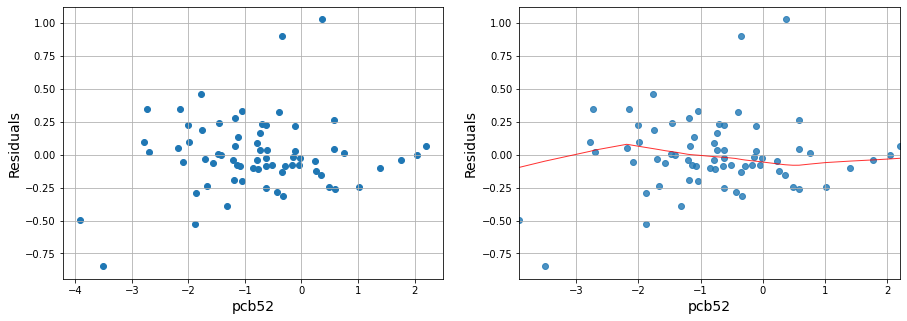

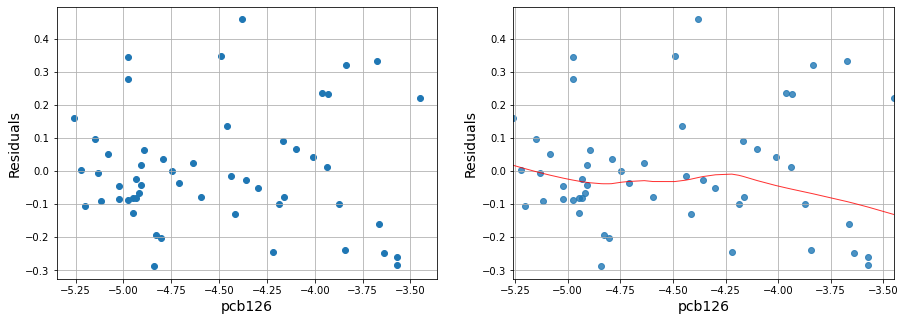

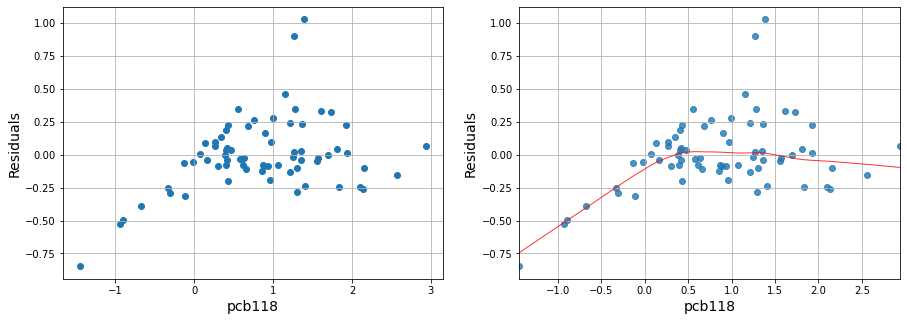

In [453]:
for pcb in pcb_list[2:]:
    fig, ax = plt.subplots(figsize=(15, 5), ncols=2)
    ax[0].scatter(np.log(data[pcb]), result_n1.resid)
    ax[0].grid()
    ax[0].set_xlabel(pcb, fontsize=14)
    ax[0].set_ylabel('Residuals', fontsize=14)
    
    sns.regplot(np.log(data[pcb]),result_n1.resid, scatter=True,
                  lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    ax[1].set_xlabel(pcb, fontsize=14)
    ax[1].set_ylabel('Residuals', fontsize=14)
    ax[1].grid()

In [454]:
pcb_list

['pcb138', 'pcb153', 'pcb180', 'pcb28', 'pcb52', 'pcb126', 'pcb118']

In [455]:
n1 = smf.ols('np.log(teqpcb) ~ log_pcb138 + log_pcb153 + log_pcb126 + np.power(log_pcb126, 2) + np.power(log_pcb180, 2)', data=data)
result_n1 = n1.fit()
result_n1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(teqpcb)   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     437.6
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           1.63e-47
Time:                        01:37:35   Log-Likelihood:                 24.760
No. Observations:                  69   AIC:                            -37.52
Df Residuals:                      63   BIC:                            -24.12
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.6663      0.460      3.625      0.001       0.748       2.585
log_pcb138                  0.9572      0.094     10.171      0.000       0.769       1.145
log_pcb153                 -0.1351      0.070     -1.941      0.057      -0.274       0.004
log_pcb126                  0.6396      0.110      5.809      0.000       0.420       0.860
np.power(log_pcb126, 2)     0.0241      0.005      5.136      0.000       0.015       0.034
np.power(log_pcb180, 2)    -0.0891      0.015     -5.848      0.000      -0.120      -0.059
==============================================================================
Omnibus:                        3.258   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                3.189
Skew:                           0.505   Prob(JB):                        0.203
Kurtosis:                       2.703   Cond. No.                     3.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [456]:
print ('Breusch-Pagan test: p=%f' % sms.het_breuschpagan(result_n1.resid, result_n1.model.exog)[1])
print ('Shapiro-Wilk test: p=%f' % stats.shapiro(result_n1.resid)[1])
print ('Wilcoxon test: p=%f' % stats.wilcoxon(result_n1.resid)[1])

Breusch-Pagan test: p=0.252055
Shapiro-Wilk test: p=0.033246
Wilcoxon test: p=0.664671


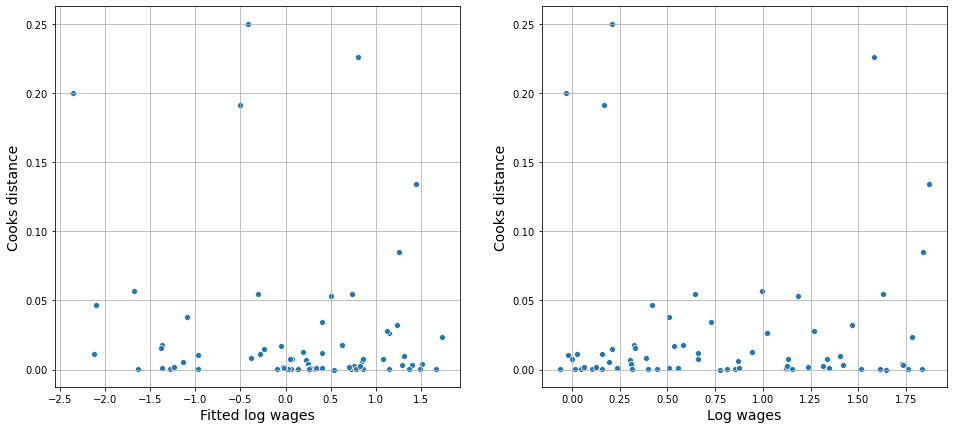

In [457]:
infl = result_n1.get_influence()
sm_fr = infl.summary_frame()

plt.figure(figsize=(16,7))
plt.subplot(121)
sns.scatterplot(result_n1.fittedvalues,sm_fr.cooks_d)
plt.xlabel('Fitted log wages', fontsize=14)
plt.ylabel('Cooks distance', fontsize=14)
plt.grid()

plt.subplot(122)
sns.scatterplot(np.log(data['teq']),sm_fr.cooks_d)
plt.xlabel('Log wages', fontsize=14)
plt.ylabel('Cooks distance', fontsize=14)
plt.grid()

In [458]:
data_cook = data[sm_fr.cooks_d <= 0.15]

In [459]:
n2 = smf.ols('np.log(teqpcb) ~ log_pcb138 + log_pcb180 + log_pcb153 + log_pcb126 + np.power(log_pcb126, 2) + np.power(log_pcb180, 2)', data=data_cook)
result_n2 = n2.fit()
result_n2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(teqpcb)   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     487.6
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           1.06e-47
Time:                        01:37:40   Log-Likelihood:                 37.816
No. Observations:                  65   AIC:                            -61.63
Df Residuals:                      58   BIC:                            -46.41
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.5973      0.457      5.686      0.000       1.683       3.512
log_pcb138                  0.7672      0.105      7.320      0.000       0.557       0.977
log_pcb180                 -0.0605      0.065     -0.926      0.358      -0.191       0.070
log_pcb153                 -0.0700      0.060     -1.165      0.249      -0.190       0.050
log_pcb126                  0.8217      0.104      7.868      0.000       0.613       1.031
np.power(log_pcb126, 2)     0.0314      0.004      7.080      0.000       0.023       0.040
np.power(log_pcb180, 2)    -0.0712      0.019     -3.815      0.000      -0.109      -0.034
==============================================================================
Omnibus:                        1.270   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                0.641
Skew:                           0.164   Prob(JB):                        0.726
Kurtosis:                       3.359   Cond. No.                     4.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

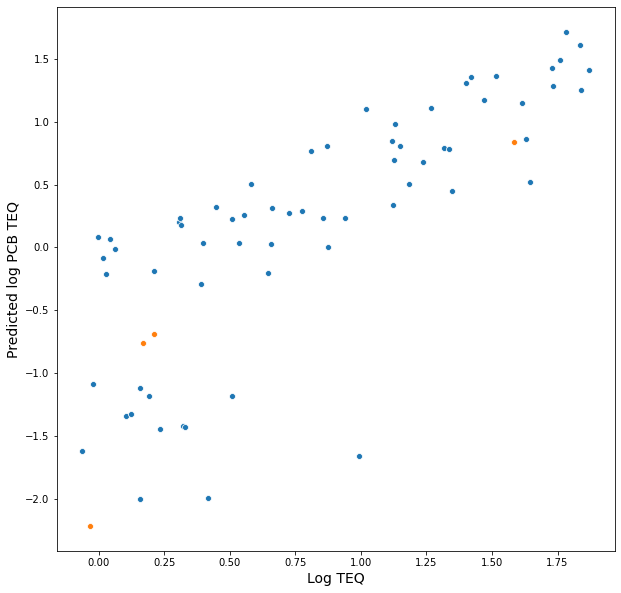

In [462]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(np.log(data['teq']),result_n2.fittedvalues)
sns.scatterplot(np.log(data[sm_fr.cooks_d > 0.15]['teq']),result_n2.predict(data[sm_fr.cooks_d > 0.15]))
plt.xlabel('Log TEQ', fontsize=14)
plt.ylabel('Predicted log PCB TEQ', fontsize=14)
plt.show()

# Проделаем аналогичные действия для построения модели прогнозирования суммарной ПХБ

In [463]:
b1 = smf.ols('np.log(pcb) ~ log_pcb153 + log_pcb28 + log_pcb126 + np.power(log_pcb126, 2) + np.power(log_pcb118, 2)', data=data)
result_b1 = b1.fit()
result_b1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(pcb)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     173.5
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           1.86e-35
Time:                        01:38:46   Log-Likelihood:                 10.715
No. Observations:                  69   AIC:                            -9.431
Df Residuals:                      63   BIC:                             3.974
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.1413      0.505      8.200      0.000       3.132       5.151
log_pcb153                  0.5768      0.042     13.817      0.000       0.493       0.660
log_pcb28                   0.1982      0.026      7.500      0.000       0.145       0.251
log_pcb126                  0.2480      0.128      1.939      0.057      -0.008       0.504
np.power(log_pcb126, 2)     0.0098      0.006      1.778      0.080      -0.001       0.021
np.power(log_pcb118, 2)     0.0340      0.026      1.310      0.195      -0.018       0.086
==============================================================================
Omnibus:                        1.497   Durbin-Watson:                   2.323
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                1.364
Skew:                           0.337   Prob(JB):                        0.506
Kurtosis:                       2.861   Cond. No.                     3.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

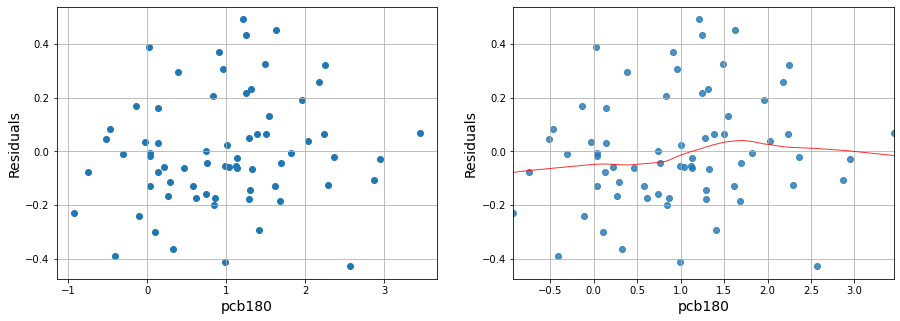

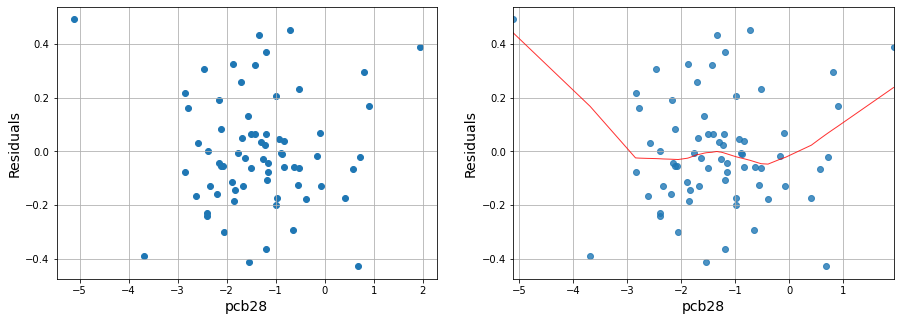

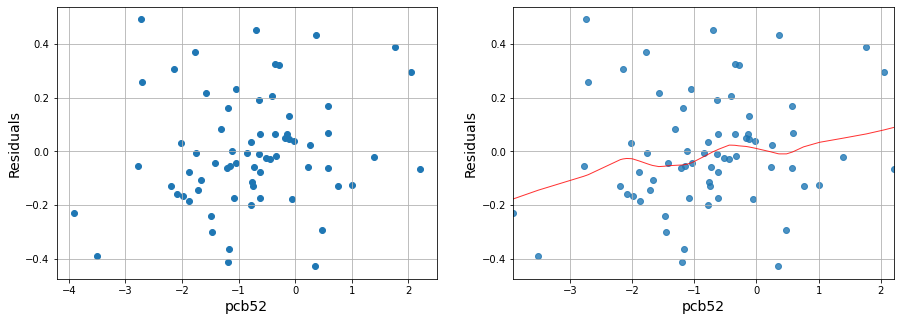

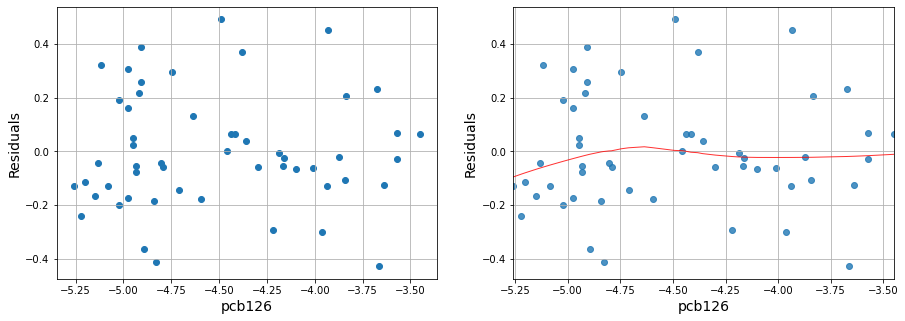

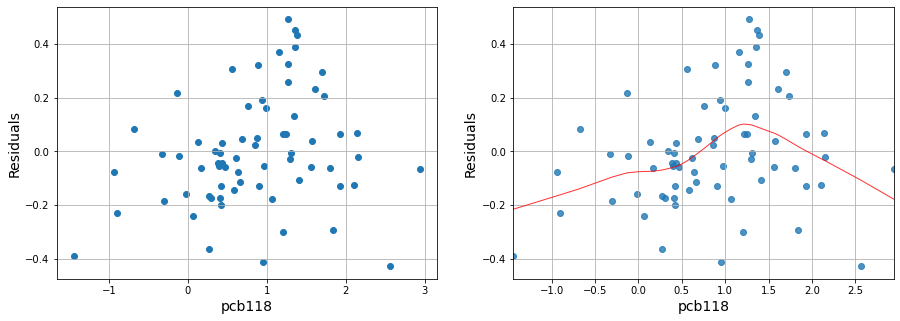

In [464]:
for pcb in pcb_list[2:]:
    fig, ax = plt.subplots(figsize=(15, 5), ncols=2)
    ax[0].scatter(np.log(data[pcb]), result_b1.resid)
    ax[0].grid()
    ax[0].set_xlabel(pcb, fontsize=14)
    ax[0].set_ylabel('Residuals', fontsize=14)
    
    sns.regplot(np.log(data[pcb]),result_b1.resid, scatter=True,
                  lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    ax[1].set_xlabel(pcb, fontsize=14)
    ax[1].set_ylabel('Residuals', fontsize=14)
    ax[1].grid()

In [465]:
b1 = smf.ols('np.log(teqpcb) ~ log_pcb138 + log_pcb153 + log_pcb126 + np.power(log_pcb28, 2) + np.power(log_pcb118, 2)', data=data)
result_b1 = b1.fit()
result_b1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(teqpcb)   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     274.8
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           2.20e-41
Time:                        01:38:48   Log-Likelihood:                 9.2739
No. Observations:                  69   AIC:                            -6.548
Df Residuals:                      63   BIC:                             6.857
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.2954      0.124     -2.385      0.020      -0.543      -0.048
log_pcb138                  0.9947      0.105      9.496      0.000       0.785       1.204
log_pcb153                 -0.3288      0.079     -4.176      0.000      -0.486      -0.171
log_pcb126                  0.0823      0.006     13.688      0.000       0.070       0.094
np.power(log_pcb28, 2)     -0.0120      0.008     -1.588      0.117      -0.027       0.003
np.power(log_pcb118, 2)     0.0550      0.022      2.472      0.016       0.011       0.099
==============================================================================
Omnibus:                        0.227   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.893   Jarque-Bera (JB):                0.100
Skew:                          -0.093   Prob(JB):                        0.951
Kurtosis:                       2.979   Cond. No.                         58.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [466]:
print ('Breusch-Pagan test: p=%f' % sms.het_breuschpagan(result_b1.resid, result_b1.model.exog)[1])
print ('Shapiro-Wilk test: p=%f' % stats.shapiro(result_b1.resid)[1])
print ('Wilcoxon test: p=%f' % stats.wilcoxon(result_b1.resid)[1])

Breusch-Pagan test: p=0.425658
Shapiro-Wilk test: p=0.904766
Wilcoxon test: p=0.954705


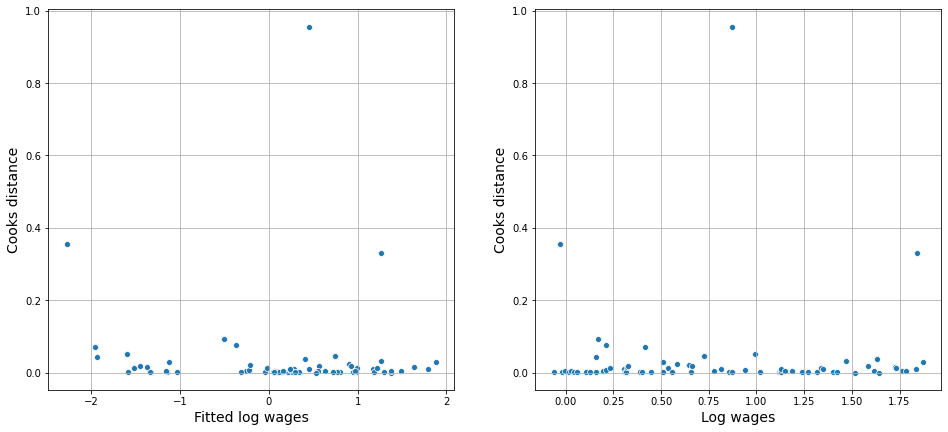

In [467]:
infl = result_b1.get_influence()
sm_fr = infl.summary_frame()

plt.figure(figsize=(16,7))
plt.subplot(121)
sns.scatterplot(result_b1.fittedvalues,sm_fr.cooks_d)
plt.xlabel('Fitted log wages', fontsize=14)
plt.ylabel('Cooks distance', fontsize=14)
plt.grid()

plt.subplot(122)
sns.scatterplot(np.log(data['teq']),sm_fr.cooks_d)
plt.xlabel('Log wages', fontsize=14)
plt.ylabel('Cooks distance', fontsize=14)
plt.grid()

In [468]:
data_cook = data[sm_fr.cooks_d <= 0.2]

In [469]:
b2 = smf.ols('np.log(teqpcb) ~ log_pcb138 + log_pcb153 + log_pcb126 + np.power(log_pcb126, 2) + np.power(log_pcb180, 2)', data=data_cook)
result_b2 = b2.fit()
result_b2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(teqpcb)   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     407.3
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           6.33e-45
Time:                        01:38:49   Log-Likelihood:                 26.638
No. Observations:                  66   AIC:                            -41.28
Df Residuals:                      60   BIC:                            -28.14
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.8266      0.465      3.929      0.000       0.897       2.757
log_pcb138                  0.9140      0.097      9.378      0.000       0.719       1.109
log_pcb153                 -0.1472      0.071     -2.064      0.043      -0.290      -0.005
log_pcb126                  0.6622      0.110      5.995      0.000       0.441       0.883
np.power(log_pcb126, 2)     0.0251      0.005      5.321      0.000       0.016       0.035
np.power(log_pcb180, 2)    -0.0784      0.015     -5.058      0.000      -0.109      -0.047
==============================================================================
Omnibus:                        3.819   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.148   Jarque-Bera (JB):                3.163
Skew:                           0.528   Prob(JB):                        0.206
Kurtosis:                       3.183   Cond. No.                     3.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

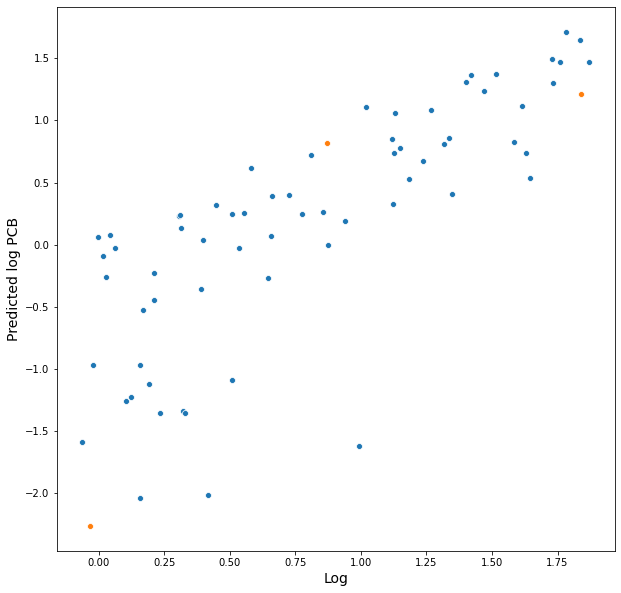

In [470]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(np.log(data['teq']),result_b2.fittedvalues)
sns.scatterplot(np.log(data[sm_fr.cooks_d > 0.2]['teq']), result_b2.predict(data[sm_fr.cooks_d > 0.2]))
plt.xlabel('Log', fontsize=14)
plt.ylabel('Predicted log PCB', fontsize=14)
plt.show()

Полученная модель объясняет 97% вариаций логарифма откликов (логарифма значения ПХБ).

Таким образом, при построении моделей регрессии было получено, что по нескольким видам ПХБ можно оценивать (логарифм) токсической эквивалентности рыбы, при этом использовать все данные необязательно - некоторые из них будут вносить несущественный вклад (в том числе и из-за допустимой взаимозависимости между ними). Вместе с этим необходимо анализировать остатки модели для опционального дополнения набора признаков преобразованными признаками. Также для повышения качества работы модели можно по расстоянию Кука отобрать объекты, "мешающие" работе модели и попробовать перестроить регрессию без них. После всех процедур признаки можно ещё раз отобрать на значимость по p-значениям проверок соответствующих коэффициентов регрессии.